In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [494]:
train = pd.read_csv(r"D:\Data Science\Music Genre Classification\train.csv")
test = pd.read_csv(r"D:\Data Science\Music Genre Classification\test.csv")
sample = pd.read_csv(r"D:\Data Science\Music Genre Classification\submission.csv")

In [495]:
train.head()


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [496]:
train.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [497]:
df = pd.concat([train, test], axis = 0)

In [498]:
df.fillna(999, inplace = True)
le = LabelEncoder()
df[['Artist Name', 'Track Name']] = df[['Artist Name', 'Track Name']].apply(le.fit_transform)

In [499]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:]

In [500]:
target = 'Class'
features = [col for col in train.columns if col not in [target]]

X = train_proc.drop(target, axis = 1)
y = train_proc[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size = 0.2,random_state = 42)

In [501]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict_proba(X_test)
print(f'log loss is : {log_loss(y_test, y_preds)}')

log loss is : 1.8042939352726388


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [502]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preds = dt.predict_proba(X_test)
print(f'log loss is : {log_loss(y_test, y_preds)}')

log loss is : 20.477626950428352


In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds = rf.predict_proba(X_test)
print(f'log loss is : {log_loss(y_test, y_preds)}')

log loss is : 1.5029327526589316


In [52]:
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)
y_preds = ad.predict_proba(X_test)
print(f'Log loss is : {log_loss(y_test, y_preds)}')

Log loss is : 2.839202662488329


In [53]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_preds = lgb.predict_proba(X_test)
print(f'Log loss is : {log_loss(y_test, y_preds)}')

Log loss is : 1.2022543526914866


In [59]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_preds = cat.predict_proba(X_test)
print(f'log loss is : {log_loss(y_test, y_preds)}')

Learning rate set to 0.090655
0:	learn: 2.2187298	total: 40ms	remaining: 39.9s
1:	learn: 2.1031290	total: 78.3ms	remaining: 39.1s
2:	learn: 2.0167127	total: 117ms	remaining: 38.8s
3:	learn: 1.9361629	total: 154ms	remaining: 38.3s
4:	learn: 1.8662398	total: 194ms	remaining: 38.6s
5:	learn: 1.8085371	total: 237ms	remaining: 39.2s
6:	learn: 1.7565645	total: 277ms	remaining: 39.3s
7:	learn: 1.7123478	total: 318ms	remaining: 39.4s
8:	learn: 1.6718954	total: 358ms	remaining: 39.5s
9:	learn: 1.6368131	total: 400ms	remaining: 39.6s
10:	learn: 1.6074483	total: 444ms	remaining: 40s
11:	learn: 1.5806801	total: 485ms	remaining: 39.9s
12:	learn: 1.5561292	total: 525ms	remaining: 39.8s
13:	learn: 1.5329966	total: 567ms	remaining: 39.9s
14:	learn: 1.5140987	total: 610ms	remaining: 40s
15:	learn: 1.4948648	total: 655ms	remaining: 40.3s
16:	learn: 1.4720535	total: 703ms	remaining: 40.6s
17:	learn: 1.4572690	total: 749ms	remaining: 40.9s
18:	learn: 1.4440215	total: 792ms	remaining: 40.9s
19:	learn: 1.43

161:	learn: 1.0430859	total: 7.89s	remaining: 40.8s
162:	learn: 1.0420566	total: 7.95s	remaining: 40.8s
163:	learn: 1.0408640	total: 8.02s	remaining: 40.9s
164:	learn: 1.0393051	total: 8.07s	remaining: 40.8s
165:	learn: 1.0382237	total: 8.12s	remaining: 40.8s
166:	learn: 1.0372573	total: 8.17s	remaining: 40.8s
167:	learn: 1.0360962	total: 8.22s	remaining: 40.7s
168:	learn: 1.0348735	total: 8.28s	remaining: 40.7s
169:	learn: 1.0337947	total: 8.34s	remaining: 40.7s
170:	learn: 1.0326659	total: 8.39s	remaining: 40.7s
171:	learn: 1.0317800	total: 8.44s	remaining: 40.6s
172:	learn: 1.0305963	total: 8.48s	remaining: 40.6s
173:	learn: 1.0297302	total: 8.53s	remaining: 40.5s
174:	learn: 1.0287666	total: 8.59s	remaining: 40.5s
175:	learn: 1.0276443	total: 8.64s	remaining: 40.4s
176:	learn: 1.0263281	total: 8.69s	remaining: 40.4s
177:	learn: 1.0254412	total: 8.74s	remaining: 40.3s
178:	learn: 1.0244800	total: 8.79s	remaining: 40.3s
179:	learn: 1.0232442	total: 8.85s	remaining: 40.3s
180:	learn: 

323:	learn: 0.9027709	total: 16.6s	remaining: 34.6s
324:	learn: 0.9021243	total: 16.7s	remaining: 34.6s
325:	learn: 0.9015925	total: 16.7s	remaining: 34.6s
326:	learn: 0.9009547	total: 16.8s	remaining: 34.5s
327:	learn: 0.9002831	total: 16.8s	remaining: 34.5s
328:	learn: 0.8996999	total: 16.9s	remaining: 34.5s
329:	learn: 0.8990384	total: 17s	remaining: 34.4s
330:	learn: 0.8984446	total: 17s	remaining: 34.4s
331:	learn: 0.8973935	total: 17.1s	remaining: 34.4s
332:	learn: 0.8969267	total: 17.1s	remaining: 34.3s
333:	learn: 0.8964779	total: 17.2s	remaining: 34.3s
334:	learn: 0.8957605	total: 17.2s	remaining: 34.2s
335:	learn: 0.8948667	total: 17.3s	remaining: 34.2s
336:	learn: 0.8941607	total: 17.3s	remaining: 34.1s
337:	learn: 0.8936614	total: 17.4s	remaining: 34.1s
338:	learn: 0.8929348	total: 17.5s	remaining: 34s
339:	learn: 0.8925062	total: 17.5s	remaining: 34s
340:	learn: 0.8919679	total: 17.6s	remaining: 34s
341:	learn: 0.8910684	total: 17.7s	remaining: 34s
342:	learn: 0.8903653	to

482:	learn: 0.8025806	total: 25.6s	remaining: 27.4s
483:	learn: 0.8018035	total: 25.7s	remaining: 27.4s
484:	learn: 0.8013282	total: 25.7s	remaining: 27.3s
485:	learn: 0.8004217	total: 25.8s	remaining: 27.3s
486:	learn: 0.7999256	total: 25.8s	remaining: 27.2s
487:	learn: 0.7994772	total: 25.9s	remaining: 27.2s
488:	learn: 0.7990776	total: 26s	remaining: 27.1s
489:	learn: 0.7985703	total: 26s	remaining: 27.1s
490:	learn: 0.7975681	total: 26.1s	remaining: 27s
491:	learn: 0.7969301	total: 26.1s	remaining: 27s
492:	learn: 0.7965025	total: 26.2s	remaining: 26.9s
493:	learn: 0.7962096	total: 26.2s	remaining: 26.9s
494:	learn: 0.7955340	total: 26.3s	remaining: 26.8s
495:	learn: 0.7949838	total: 26.3s	remaining: 26.8s
496:	learn: 0.7943635	total: 26.4s	remaining: 26.7s
497:	learn: 0.7939423	total: 26.4s	remaining: 26.6s
498:	learn: 0.7932065	total: 26.5s	remaining: 26.6s
499:	learn: 0.7926743	total: 26.5s	remaining: 26.5s
500:	learn: 0.7921590	total: 26.6s	remaining: 26.5s
501:	learn: 0.791662

643:	learn: 0.7242936	total: 33.9s	remaining: 18.7s
644:	learn: 0.7237928	total: 33.9s	remaining: 18.7s
645:	learn: 0.7233656	total: 34s	remaining: 18.6s
646:	learn: 0.7227737	total: 34s	remaining: 18.6s
647:	learn: 0.7223011	total: 34.1s	remaining: 18.5s
648:	learn: 0.7219049	total: 34.1s	remaining: 18.5s
649:	learn: 0.7215691	total: 34.2s	remaining: 18.4s
650:	learn: 0.7208402	total: 34.2s	remaining: 18.3s
651:	learn: 0.7203428	total: 34.3s	remaining: 18.3s
652:	learn: 0.7198970	total: 34.3s	remaining: 18.2s
653:	learn: 0.7194065	total: 34.4s	remaining: 18.2s
654:	learn: 0.7188302	total: 34.4s	remaining: 18.1s
655:	learn: 0.7181804	total: 34.5s	remaining: 18.1s
656:	learn: 0.7175251	total: 34.5s	remaining: 18s
657:	learn: 0.7171736	total: 34.6s	remaining: 18s
658:	learn: 0.7169217	total: 34.6s	remaining: 17.9s
659:	learn: 0.7164770	total: 34.7s	remaining: 17.9s
660:	learn: 0.7159795	total: 34.7s	remaining: 17.8s
661:	learn: 0.7155864	total: 34.8s	remaining: 17.8s
662:	learn: 0.715151

805:	learn: 0.6553770	total: 42.1s	remaining: 10.1s
806:	learn: 0.6547628	total: 42.1s	remaining: 10.1s
807:	learn: 0.6544439	total: 42.2s	remaining: 10s
808:	learn: 0.6540400	total: 42.2s	remaining: 9.97s
809:	learn: 0.6537207	total: 42.3s	remaining: 9.92s
810:	learn: 0.6533020	total: 42.3s	remaining: 9.86s
811:	learn: 0.6527749	total: 42.4s	remaining: 9.81s
812:	learn: 0.6522495	total: 42.4s	remaining: 9.76s
813:	learn: 0.6515350	total: 42.5s	remaining: 9.71s
814:	learn: 0.6512781	total: 42.5s	remaining: 9.65s
815:	learn: 0.6506915	total: 42.6s	remaining: 9.6s
816:	learn: 0.6503632	total: 42.6s	remaining: 9.55s
817:	learn: 0.6500468	total: 42.7s	remaining: 9.5s
818:	learn: 0.6497435	total: 42.7s	remaining: 9.44s
819:	learn: 0.6492364	total: 42.8s	remaining: 9.39s
820:	learn: 0.6487732	total: 42.8s	remaining: 9.34s
821:	learn: 0.6484953	total: 42.9s	remaining: 9.29s
822:	learn: 0.6481729	total: 42.9s	remaining: 9.23s
823:	learn: 0.6476946	total: 43s	remaining: 9.18s
824:	learn: 0.6472

965:	learn: 0.5965131	total: 50.5s	remaining: 1.78s
966:	learn: 0.5961070	total: 50.6s	remaining: 1.73s
967:	learn: 0.5957020	total: 50.7s	remaining: 1.67s
968:	learn: 0.5952603	total: 50.7s	remaining: 1.62s
969:	learn: 0.5949790	total: 50.8s	remaining: 1.57s
970:	learn: 0.5944961	total: 50.8s	remaining: 1.52s
971:	learn: 0.5942211	total: 50.9s	remaining: 1.47s
972:	learn: 0.5937930	total: 50.9s	remaining: 1.41s
973:	learn: 0.5934913	total: 51s	remaining: 1.36s
974:	learn: 0.5933128	total: 51s	remaining: 1.31s
975:	learn: 0.5930663	total: 51.1s	remaining: 1.25s
976:	learn: 0.5925926	total: 51.1s	remaining: 1.2s
977:	learn: 0.5922661	total: 51.2s	remaining: 1.15s
978:	learn: 0.5919842	total: 51.2s	remaining: 1.1s
979:	learn: 0.5916870	total: 51.3s	remaining: 1.05s
980:	learn: 0.5912521	total: 51.3s	remaining: 994ms
981:	learn: 0.5909628	total: 51.4s	remaining: 942ms
982:	learn: 0.5906861	total: 51.4s	remaining: 889ms
983:	learn: 0.5904349	total: 51.5s	remaining: 837ms
984:	learn: 0.5901

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_preds = xgb.predict_proba(X_test)
print(f'log loss is : {log_loss(y_test, y_preds)}')

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
log loss is : 1.2077283108732146


---

## Cross Validation

In [503]:
features = [col for col in train.columns if col not in [target]]

In [1256]:
def cross_val(train, test, features, clf):
    N_splits = 10
    
    oofs = np.zeros(shape=(len(train), 11))
    preds = np.zeros(shape=(len(test), 11))
    
    target_col = train[target]
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True,random_state = 1999)
    stratified_target = pd.qcut( train[target], 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
        print(f'\n================================Fold{index + 1}===================================')
        
        #### Train Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        #### Validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        #### Test Set
        X_test = test[features]
        
        #### Scaling Data ####
        #scaler = StandardScaler()
        #_ = scaler.fit(X_trn)
        
        #X_trn = scaler.transform(X_trn)
        #X_val = scaler.transform(X_val)
        #X_test = scaler.transform(X_test)
        
        ############ Fitting #############
        _ = clf.fit(X_trn, y_trn)
        
        ############ Predicting #############
        val_preds = clf.predict_proba(X_val)
        test_preds = clf.predict_proba(X_test)
        
        error = log_loss(y_val, val_preds)
        print(f'\n Logloss for Validation set is : {error}')
        
        oofs[val_idx] = val_preds
        preds += test_preds / N_splits
        
    total_error = log_loss(target_col, oofs)
    print(f'\nLogloss for oofs is {total_error}')
    
    return oofs, preds

In [509]:
lgb_oofs, lgb_preds = cross_val(train_proc, test_proc, features, LGBMClassifier(random_state = 42))
# 1.1826771652774295


================================Fold1===================================

 Logloss for Validation set is : 1.2022020525352322

================================Fold2===================================

 Logloss for Validation set is : 1.1782248227849235

================================Fold3===================================

 Logloss for Validation set is : 1.1618998848906794

================================Fold4===================================

 Logloss for Validation set is : 1.1966717600376775

================================Fold5===================================

 Logloss for Validation set is : 1.1664141549338556

================================Fold6===================================

 Logloss for Validation set is : 1.1676161029008396

================================Fold7===================================

 Logloss for Validation set is : 1.1831936654422521

================================Fold8===================================

 Logloss for Validation set is : 1.1

In [160]:
xgb_oofs, xgb_preds = cross_val(train_proc, test_proc, features, XGBClassifier(random_state = 42))


================================Fold1===================================
[22:05:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Logloss for Validation set is : 1.2194996717730082

================================Fold2===================================
[22:06:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Logloss for Validation set is : 1.2199156161063942

================================Fold3===================================
[22:06:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Logloss for Validation set is : 1.2231188412142948

================================Fold4===================================
[22:06:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Logloss for Validation set is : 1.2273863959938767

================================Fold5===================================
[22:06:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 Logloss for Validation set is : 1.2492495199770257

\Logloss for oofs is 1.2278335540336185


In [162]:
cat_oofs, cat_preds = cross_val(train_proc, test_proc, features, CatBoostClassifier(random_state = 42))


================================Fold1===================================
Learning rate set to 0.090655
0:	learn: 2.2312140	total: 40.3ms	remaining: 40.3s
1:	learn: 2.1163660	total: 79.5ms	remaining: 39.7s
2:	learn: 2.0205270	total: 120ms	remaining: 39.8s
3:	learn: 1.9420728	total: 160ms	remaining: 39.9s
4:	learn: 1.8741066	total: 199ms	remaining: 39.5s
5:	learn: 1.8221810	total: 236ms	remaining: 39.2s
6:	learn: 1.7737866	total: 275ms	remaining: 38.9s
7:	learn: 1.7263578	total: 312ms	remaining: 38.7s
8:	learn: 1.6827999	total: 356ms	remaining: 39.2s
9:	learn: 1.6491696	total: 395ms	remaining: 39.1s
10:	learn: 1.6251162	total: 433ms	remaining: 38.9s
11:	learn: 1.5930994	total: 471ms	remaining: 38.8s
12:	learn: 1.5669666	total: 510ms	remaining: 38.7s
13:	learn: 1.5442586	total: 547ms	remaining: 38.6s
14:	learn: 1.5259105	total: 591ms	remaining: 38.8s
15:	learn: 1.5021867	total: 629ms	remaining: 38.7s
16:	learn: 1.4880490	total: 668ms	remaining: 38.6s
17:	learn: 1.4746322	total: 706ms	rem

161:	learn: 1.0424088	total: 6.96s	remaining: 36s
162:	learn: 1.0410495	total: 7.01s	remaining: 36s
163:	learn: 1.0404758	total: 7.05s	remaining: 35.9s
164:	learn: 1.0394864	total: 7.09s	remaining: 35.9s
165:	learn: 1.0380243	total: 7.13s	remaining: 35.8s
166:	learn: 1.0369552	total: 7.18s	remaining: 35.8s
167:	learn: 1.0363408	total: 7.22s	remaining: 35.8s
168:	learn: 1.0348980	total: 7.27s	remaining: 35.8s
169:	learn: 1.0338345	total: 7.31s	remaining: 35.7s
170:	learn: 1.0329653	total: 7.36s	remaining: 35.7s
171:	learn: 1.0318601	total: 7.4s	remaining: 35.6s
172:	learn: 1.0307998	total: 7.45s	remaining: 35.6s
173:	learn: 1.0296209	total: 7.49s	remaining: 35.6s
174:	learn: 1.0287364	total: 7.53s	remaining: 35.5s
175:	learn: 1.0279525	total: 7.58s	remaining: 35.5s
176:	learn: 1.0267300	total: 7.62s	remaining: 35.4s
177:	learn: 1.0260056	total: 7.67s	remaining: 35.4s
178:	learn: 1.0252112	total: 7.71s	remaining: 35.4s
179:	learn: 1.0241316	total: 7.75s	remaining: 35.3s
180:	learn: 1.023

321:	learn: 0.9074942	total: 14.3s	remaining: 30.1s
322:	learn: 0.9066380	total: 14.3s	remaining: 30s
323:	learn: 0.9059821	total: 14.4s	remaining: 30s
324:	learn: 0.9053619	total: 14.4s	remaining: 29.9s
325:	learn: 0.9043916	total: 14.5s	remaining: 29.9s
326:	learn: 0.9035740	total: 14.5s	remaining: 29.9s
327:	learn: 0.9029211	total: 14.6s	remaining: 29.8s
328:	learn: 0.9020412	total: 14.6s	remaining: 29.8s
329:	learn: 0.9013662	total: 14.6s	remaining: 29.7s
330:	learn: 0.9007825	total: 14.7s	remaining: 29.7s
331:	learn: 0.8999107	total: 14.7s	remaining: 29.7s
332:	learn: 0.8992792	total: 14.8s	remaining: 29.6s
333:	learn: 0.8982502	total: 14.8s	remaining: 29.6s
334:	learn: 0.8974615	total: 14.9s	remaining: 29.6s
335:	learn: 0.8965777	total: 14.9s	remaining: 29.5s
336:	learn: 0.8958195	total: 15s	remaining: 29.5s
337:	learn: 0.8952698	total: 15s	remaining: 29.4s
338:	learn: 0.8945395	total: 15.1s	remaining: 29.4s
339:	learn: 0.8939966	total: 15.1s	remaining: 29.4s
340:	learn: 0.893352

480:	learn: 0.8015092	total: 22s	remaining: 23.8s
481:	learn: 0.8011797	total: 22.1s	remaining: 23.7s
482:	learn: 0.8005062	total: 22.1s	remaining: 23.7s
483:	learn: 0.7998639	total: 22.2s	remaining: 23.6s
484:	learn: 0.7992878	total: 22.2s	remaining: 23.6s
485:	learn: 0.7985905	total: 22.3s	remaining: 23.6s
486:	learn: 0.7980495	total: 22.3s	remaining: 23.5s
487:	learn: 0.7975223	total: 22.4s	remaining: 23.5s
488:	learn: 0.7968245	total: 22.4s	remaining: 23.4s
489:	learn: 0.7965347	total: 22.5s	remaining: 23.4s
490:	learn: 0.7962291	total: 22.5s	remaining: 23.3s
491:	learn: 0.7954823	total: 22.6s	remaining: 23.3s
492:	learn: 0.7950564	total: 22.6s	remaining: 23.3s
493:	learn: 0.7944911	total: 22.7s	remaining: 23.2s
494:	learn: 0.7941891	total: 22.7s	remaining: 23.2s
495:	learn: 0.7937715	total: 22.8s	remaining: 23.1s
496:	learn: 0.7931443	total: 22.8s	remaining: 23.1s
497:	learn: 0.7923811	total: 22.9s	remaining: 23s
498:	learn: 0.7916831	total: 22.9s	remaining: 23s
499:	learn: 0.7912

643:	learn: 0.7180767	total: 30.3s	remaining: 16.7s
644:	learn: 0.7175930	total: 30.3s	remaining: 16.7s
645:	learn: 0.7169962	total: 30.4s	remaining: 16.6s
646:	learn: 0.7166241	total: 30.4s	remaining: 16.6s
647:	learn: 0.7161355	total: 30.5s	remaining: 16.6s
648:	learn: 0.7155338	total: 30.5s	remaining: 16.5s
649:	learn: 0.7151955	total: 30.6s	remaining: 16.5s
650:	learn: 0.7148027	total: 30.6s	remaining: 16.4s
651:	learn: 0.7145745	total: 30.7s	remaining: 16.4s
652:	learn: 0.7140598	total: 30.7s	remaining: 16.3s
653:	learn: 0.7138146	total: 30.8s	remaining: 16.3s
654:	learn: 0.7133684	total: 30.8s	remaining: 16.2s
655:	learn: 0.7129460	total: 30.9s	remaining: 16.2s
656:	learn: 0.7123928	total: 30.9s	remaining: 16.2s
657:	learn: 0.7117809	total: 31s	remaining: 16.1s
658:	learn: 0.7113493	total: 31.1s	remaining: 16.1s
659:	learn: 0.7109364	total: 31.1s	remaining: 16s
660:	learn: 0.7105297	total: 31.2s	remaining: 16s
661:	learn: 0.7100803	total: 31.2s	remaining: 15.9s
662:	learn: 0.7097

803:	learn: 0.6496157	total: 38.5s	remaining: 9.38s
804:	learn: 0.6491055	total: 38.5s	remaining: 9.34s
805:	learn: 0.6485809	total: 38.6s	remaining: 9.29s
806:	learn: 0.6483241	total: 38.7s	remaining: 9.24s
807:	learn: 0.6480304	total: 38.7s	remaining: 9.2s
808:	learn: 0.6475658	total: 38.8s	remaining: 9.15s
809:	learn: 0.6472624	total: 38.8s	remaining: 9.1s
810:	learn: 0.6469953	total: 38.9s	remaining: 9.06s
811:	learn: 0.6466854	total: 38.9s	remaining: 9.01s
812:	learn: 0.6461469	total: 39s	remaining: 8.96s
813:	learn: 0.6456552	total: 39s	remaining: 8.91s
814:	learn: 0.6453081	total: 39.1s	remaining: 8.87s
815:	learn: 0.6450020	total: 39.1s	remaining: 8.82s
816:	learn: 0.6442189	total: 39.2s	remaining: 8.77s
817:	learn: 0.6436494	total: 39.2s	remaining: 8.73s
818:	learn: 0.6433002	total: 39.3s	remaining: 8.68s
819:	learn: 0.6431360	total: 39.3s	remaining: 8.63s
820:	learn: 0.6427678	total: 39.4s	remaining: 8.58s
821:	learn: 0.6424163	total: 39.4s	remaining: 8.54s
822:	learn: 0.6420

964:	learn: 0.5941265	total: 46.9s	remaining: 1.7s
965:	learn: 0.5937848	total: 47s	remaining: 1.65s
966:	learn: 0.5935332	total: 47s	remaining: 1.6s
967:	learn: 0.5930860	total: 47.1s	remaining: 1.56s
968:	learn: 0.5929092	total: 47.1s	remaining: 1.51s
969:	learn: 0.5926313	total: 47.2s	remaining: 1.46s
970:	learn: 0.5923391	total: 47.2s	remaining: 1.41s
971:	learn: 0.5919129	total: 47.3s	remaining: 1.36s
972:	learn: 0.5914369	total: 47.4s	remaining: 1.31s
973:	learn: 0.5911545	total: 47.4s	remaining: 1.26s
974:	learn: 0.5908491	total: 47.5s	remaining: 1.22s
975:	learn: 0.5904418	total: 47.5s	remaining: 1.17s
976:	learn: 0.5901929	total: 47.6s	remaining: 1.12s
977:	learn: 0.5898904	total: 47.6s	remaining: 1.07s
978:	learn: 0.5894905	total: 47.7s	remaining: 1.02s
979:	learn: 0.5891211	total: 47.8s	remaining: 975ms
980:	learn: 0.5889623	total: 47.8s	remaining: 926ms
981:	learn: 0.5886438	total: 47.9s	remaining: 877ms
982:	learn: 0.5882920	total: 47.9s	remaining: 829ms
983:	learn: 0.5880

123:	learn: 1.0850222	total: 6.53s	remaining: 46.1s
124:	learn: 1.0837416	total: 6.58s	remaining: 46.1s
125:	learn: 1.0827558	total: 6.63s	remaining: 46s
126:	learn: 1.0812994	total: 6.69s	remaining: 46s
127:	learn: 1.0796523	total: 6.74s	remaining: 45.9s
128:	learn: 1.0786896	total: 6.79s	remaining: 45.8s
129:	learn: 1.0775439	total: 6.84s	remaining: 45.8s
130:	learn: 1.0761473	total: 6.89s	remaining: 45.7s
131:	learn: 1.0742774	total: 6.94s	remaining: 45.7s
132:	learn: 1.0727294	total: 7s	remaining: 45.6s
133:	learn: 1.0708430	total: 7.04s	remaining: 45.5s
134:	learn: 1.0698922	total: 7.09s	remaining: 45.4s
135:	learn: 1.0691462	total: 7.14s	remaining: 45.4s
136:	learn: 1.0679887	total: 7.2s	remaining: 45.3s
137:	learn: 1.0670026	total: 7.24s	remaining: 45.3s
138:	learn: 1.0656976	total: 7.29s	remaining: 45.2s
139:	learn: 1.0646611	total: 7.34s	remaining: 45.1s
140:	learn: 1.0635012	total: 7.39s	remaining: 45s
141:	learn: 1.0623362	total: 7.44s	remaining: 45s
142:	learn: 1.0611574	to

283:	learn: 0.9357353	total: 14.8s	remaining: 37.3s
284:	learn: 0.9349887	total: 14.8s	remaining: 37.2s
285:	learn: 0.9343286	total: 14.9s	remaining: 37.2s
286:	learn: 0.9332949	total: 14.9s	remaining: 37.1s
287:	learn: 0.9326975	total: 15s	remaining: 37.1s
288:	learn: 0.9320244	total: 15.1s	remaining: 37s
289:	learn: 0.9311444	total: 15.1s	remaining: 37s
290:	learn: 0.9303805	total: 15.2s	remaining: 36.9s
291:	learn: 0.9298514	total: 15.2s	remaining: 36.9s
292:	learn: 0.9290140	total: 15.3s	remaining: 36.8s
293:	learn: 0.9280946	total: 15.3s	remaining: 36.8s
294:	learn: 0.9274070	total: 15.4s	remaining: 36.7s
295:	learn: 0.9267461	total: 15.4s	remaining: 36.7s
296:	learn: 0.9260100	total: 15.5s	remaining: 36.6s
297:	learn: 0.9251225	total: 15.5s	remaining: 36.6s
298:	learn: 0.9243252	total: 15.6s	remaining: 36.5s
299:	learn: 0.9235743	total: 15.6s	remaining: 36.4s
300:	learn: 0.9229123	total: 15.7s	remaining: 36.4s
301:	learn: 0.9220191	total: 15.7s	remaining: 36.3s
302:	learn: 0.9212

443:	learn: 0.8307039	total: 23.1s	remaining: 28.9s
444:	learn: 0.8301912	total: 23.1s	remaining: 28.8s
445:	learn: 0.8296957	total: 23.2s	remaining: 28.8s
446:	learn: 0.8293095	total: 23.2s	remaining: 28.7s
447:	learn: 0.8287543	total: 23.3s	remaining: 28.7s
448:	learn: 0.8280576	total: 23.3s	remaining: 28.6s
449:	learn: 0.8274849	total: 23.4s	remaining: 28.6s
450:	learn: 0.8270743	total: 23.4s	remaining: 28.5s
451:	learn: 0.8264926	total: 23.5s	remaining: 28.4s
452:	learn: 0.8259604	total: 23.5s	remaining: 28.4s
453:	learn: 0.8253305	total: 23.6s	remaining: 28.3s
454:	learn: 0.8248284	total: 23.6s	remaining: 28.3s
455:	learn: 0.8244260	total: 23.7s	remaining: 28.2s
456:	learn: 0.8236928	total: 23.7s	remaining: 28.2s
457:	learn: 0.8234469	total: 23.8s	remaining: 28.1s
458:	learn: 0.8228468	total: 23.8s	remaining: 28.1s
459:	learn: 0.8222192	total: 23.9s	remaining: 28s
460:	learn: 0.8216104	total: 23.9s	remaining: 28s
461:	learn: 0.8209168	total: 24s	remaining: 27.9s
462:	learn: 0.8204

604:	learn: 0.7450977	total: 31.4s	remaining: 20.5s
605:	learn: 0.7445050	total: 31.4s	remaining: 20.4s
606:	learn: 0.7438601	total: 31.5s	remaining: 20.4s
607:	learn: 0.7437075	total: 31.5s	remaining: 20.3s
608:	learn: 0.7432382	total: 31.6s	remaining: 20.3s
609:	learn: 0.7423175	total: 31.7s	remaining: 20.2s
610:	learn: 0.7417642	total: 31.7s	remaining: 20.2s
611:	learn: 0.7414190	total: 31.8s	remaining: 20.1s
612:	learn: 0.7408613	total: 31.8s	remaining: 20.1s
613:	learn: 0.7406487	total: 31.9s	remaining: 20s
614:	learn: 0.7401937	total: 31.9s	remaining: 20s
615:	learn: 0.7398084	total: 32s	remaining: 19.9s
616:	learn: 0.7394370	total: 32s	remaining: 19.9s
617:	learn: 0.7388296	total: 32.1s	remaining: 19.8s
618:	learn: 0.7384425	total: 32.1s	remaining: 19.8s
619:	learn: 0.7377851	total: 32.2s	remaining: 19.7s
620:	learn: 0.7373810	total: 32.2s	remaining: 19.7s
621:	learn: 0.7367679	total: 32.3s	remaining: 19.6s
622:	learn: 0.7363190	total: 32.3s	remaining: 19.6s
623:	learn: 0.735815

765:	learn: 0.6702856	total: 39.8s	remaining: 12.2s
766:	learn: 0.6699089	total: 39.8s	remaining: 12.1s
767:	learn: 0.6693769	total: 39.9s	remaining: 12.1s
768:	learn: 0.6688369	total: 40s	remaining: 12s
769:	learn: 0.6684532	total: 40s	remaining: 11.9s
770:	learn: 0.6678809	total: 40.1s	remaining: 11.9s
771:	learn: 0.6673431	total: 40.1s	remaining: 11.8s
772:	learn: 0.6670295	total: 40.2s	remaining: 11.8s
773:	learn: 0.6667239	total: 40.2s	remaining: 11.7s
774:	learn: 0.6662100	total: 40.3s	remaining: 11.7s
775:	learn: 0.6658937	total: 40.3s	remaining: 11.6s
776:	learn: 0.6655976	total: 40.4s	remaining: 11.6s
777:	learn: 0.6652278	total: 40.4s	remaining: 11.5s
778:	learn: 0.6649202	total: 40.5s	remaining: 11.5s
779:	learn: 0.6645413	total: 40.5s	remaining: 11.4s
780:	learn: 0.6640430	total: 40.6s	remaining: 11.4s
781:	learn: 0.6636514	total: 40.6s	remaining: 11.3s
782:	learn: 0.6633361	total: 40.7s	remaining: 11.3s
783:	learn: 0.6630361	total: 40.7s	remaining: 11.2s
784:	learn: 0.6627

927:	learn: 0.6096362	total: 48.3s	remaining: 3.75s
928:	learn: 0.6094163	total: 48.3s	remaining: 3.69s
929:	learn: 0.6090772	total: 48.4s	remaining: 3.64s
930:	learn: 0.6085712	total: 48.4s	remaining: 3.59s
931:	learn: 0.6083464	total: 48.5s	remaining: 3.54s
932:	learn: 0.6079692	total: 48.6s	remaining: 3.49s
933:	learn: 0.6075812	total: 48.6s	remaining: 3.43s
934:	learn: 0.6072214	total: 48.7s	remaining: 3.38s
935:	learn: 0.6069571	total: 48.7s	remaining: 3.33s
936:	learn: 0.6066800	total: 48.8s	remaining: 3.28s
937:	learn: 0.6062955	total: 48.8s	remaining: 3.23s
938:	learn: 0.6059722	total: 48.9s	remaining: 3.17s
939:	learn: 0.6055084	total: 48.9s	remaining: 3.12s
940:	learn: 0.6051375	total: 49s	remaining: 3.07s
941:	learn: 0.6048415	total: 49s	remaining: 3.02s
942:	learn: 0.6042668	total: 49.1s	remaining: 2.97s
943:	learn: 0.6038514	total: 49.1s	remaining: 2.91s
944:	learn: 0.6034693	total: 49.2s	remaining: 2.86s
945:	learn: 0.6030024	total: 49.2s	remaining: 2.81s
946:	learn: 0.60

87:	learn: 1.1468043	total: 4.65s	remaining: 48.2s
88:	learn: 1.1447543	total: 4.7s	remaining: 48.1s
89:	learn: 1.1435214	total: 4.75s	remaining: 48.1s
90:	learn: 1.1416799	total: 4.81s	remaining: 48s
91:	learn: 1.1401349	total: 4.86s	remaining: 48s
92:	learn: 1.1387026	total: 4.91s	remaining: 47.9s
93:	learn: 1.1373920	total: 4.96s	remaining: 47.8s
94:	learn: 1.1355408	total: 5.01s	remaining: 47.8s
95:	learn: 1.1335738	total: 5.07s	remaining: 47.7s
96:	learn: 1.1321390	total: 5.12s	remaining: 47.7s
97:	learn: 1.1306951	total: 5.17s	remaining: 47.6s
98:	learn: 1.1293463	total: 5.22s	remaining: 47.6s
99:	learn: 1.1279077	total: 5.28s	remaining: 47.5s
100:	learn: 1.1265369	total: 5.33s	remaining: 47.5s
101:	learn: 1.1246569	total: 5.39s	remaining: 47.4s
102:	learn: 1.1227039	total: 5.44s	remaining: 47.3s
103:	learn: 1.1208521	total: 5.49s	remaining: 47.3s
104:	learn: 1.1193496	total: 5.54s	remaining: 47.2s
105:	learn: 1.1179040	total: 5.59s	remaining: 47.2s
106:	learn: 1.1161444	total: 5

247:	learn: 0.9657021	total: 13.1s	remaining: 39.8s
248:	learn: 0.9648203	total: 13.2s	remaining: 39.8s
249:	learn: 0.9639497	total: 13.2s	remaining: 39.7s
250:	learn: 0.9631717	total: 13.3s	remaining: 39.7s
251:	learn: 0.9623630	total: 13.3s	remaining: 39.6s
252:	learn: 0.9614085	total: 13.4s	remaining: 39.6s
253:	learn: 0.9603347	total: 13.5s	remaining: 39.5s
254:	learn: 0.9593941	total: 13.5s	remaining: 39.5s
255:	learn: 0.9587301	total: 13.6s	remaining: 39.4s
256:	learn: 0.9581354	total: 13.6s	remaining: 39.4s
257:	learn: 0.9572267	total: 13.7s	remaining: 39.3s
258:	learn: 0.9562831	total: 13.7s	remaining: 39.3s
259:	learn: 0.9553169	total: 13.8s	remaining: 39.3s
260:	learn: 0.9542267	total: 13.9s	remaining: 39.2s
261:	learn: 0.9534378	total: 13.9s	remaining: 39.2s
262:	learn: 0.9527100	total: 14s	remaining: 39.1s
263:	learn: 0.9519052	total: 14s	remaining: 39.1s
264:	learn: 0.9509935	total: 14.1s	remaining: 39.1s
265:	learn: 0.9502351	total: 14.1s	remaining: 39s
266:	learn: 0.9494

407:	learn: 0.8548340	total: 21.9s	remaining: 31.8s
408:	learn: 0.8542499	total: 22s	remaining: 31.7s
409:	learn: 0.8537075	total: 22s	remaining: 31.7s
410:	learn: 0.8533256	total: 22.1s	remaining: 31.6s
411:	learn: 0.8527278	total: 22.1s	remaining: 31.6s
412:	learn: 0.8522645	total: 22.2s	remaining: 31.5s
413:	learn: 0.8516442	total: 22.2s	remaining: 31.5s
414:	learn: 0.8510477	total: 22.3s	remaining: 31.4s
415:	learn: 0.8503865	total: 22.3s	remaining: 31.4s
416:	learn: 0.8500553	total: 22.4s	remaining: 31.3s
417:	learn: 0.8494159	total: 22.4s	remaining: 31.2s
418:	learn: 0.8487677	total: 22.5s	remaining: 31.2s
419:	learn: 0.8482271	total: 22.5s	remaining: 31.1s
420:	learn: 0.8476354	total: 22.6s	remaining: 31.1s
421:	learn: 0.8468563	total: 22.6s	remaining: 31s
422:	learn: 0.8461363	total: 22.7s	remaining: 31s
423:	learn: 0.8456705	total: 22.8s	remaining: 30.9s
424:	learn: 0.8452629	total: 22.8s	remaining: 30.9s
425:	learn: 0.8446203	total: 22.9s	remaining: 30.8s
426:	learn: 0.844075

567:	learn: 0.7665072	total: 30.5s	remaining: 23.2s
568:	learn: 0.7660336	total: 30.6s	remaining: 23.2s
569:	learn: 0.7656215	total: 30.6s	remaining: 23.1s
570:	learn: 0.7651689	total: 30.7s	remaining: 23.1s
571:	learn: 0.7647590	total: 30.7s	remaining: 23s
572:	learn: 0.7642832	total: 30.8s	remaining: 22.9s
573:	learn: 0.7638108	total: 30.8s	remaining: 22.9s
574:	learn: 0.7632391	total: 30.9s	remaining: 22.8s
575:	learn: 0.7626698	total: 30.9s	remaining: 22.8s
576:	learn: 0.7620380	total: 31s	remaining: 22.7s
577:	learn: 0.7615422	total: 31.1s	remaining: 22.7s
578:	learn: 0.7609551	total: 31.1s	remaining: 22.6s
579:	learn: 0.7602666	total: 31.2s	remaining: 22.6s
580:	learn: 0.7596858	total: 31.2s	remaining: 22.5s
581:	learn: 0.7589214	total: 31.3s	remaining: 22.5s
582:	learn: 0.7583413	total: 31.3s	remaining: 22.4s
583:	learn: 0.7577162	total: 31.4s	remaining: 22.4s
584:	learn: 0.7572598	total: 31.5s	remaining: 22.3s
585:	learn: 0.7568373	total: 31.5s	remaining: 22.3s
586:	learn: 0.75

727:	learn: 0.6919075	total: 39.9s	remaining: 14.9s
728:	learn: 0.6914790	total: 39.9s	remaining: 14.8s
729:	learn: 0.6912441	total: 40s	remaining: 14.8s
730:	learn: 0.6907146	total: 40.1s	remaining: 14.7s
731:	learn: 0.6902071	total: 40.1s	remaining: 14.7s
732:	learn: 0.6896594	total: 40.2s	remaining: 14.6s
733:	learn: 0.6894304	total: 40.2s	remaining: 14.6s
734:	learn: 0.6889129	total: 40.3s	remaining: 14.5s
735:	learn: 0.6882111	total: 40.4s	remaining: 14.5s
736:	learn: 0.6876352	total: 40.4s	remaining: 14.4s
737:	learn: 0.6871317	total: 40.5s	remaining: 14.4s
738:	learn: 0.6866948	total: 40.5s	remaining: 14.3s
739:	learn: 0.6863502	total: 40.6s	remaining: 14.3s
740:	learn: 0.6859462	total: 40.7s	remaining: 14.2s
741:	learn: 0.6856462	total: 40.7s	remaining: 14.2s
742:	learn: 0.6850813	total: 40.8s	remaining: 14.1s
743:	learn: 0.6847224	total: 40.8s	remaining: 14.1s
744:	learn: 0.6840048	total: 40.9s	remaining: 14s
745:	learn: 0.6835560	total: 40.9s	remaining: 13.9s
746:	learn: 0.68

887:	learn: 0.6283521	total: 49.5s	remaining: 6.24s
888:	learn: 0.6279428	total: 49.5s	remaining: 6.18s
889:	learn: 0.6277046	total: 49.6s	remaining: 6.13s
890:	learn: 0.6274675	total: 49.6s	remaining: 6.07s
891:	learn: 0.6271464	total: 49.7s	remaining: 6.01s
892:	learn: 0.6268356	total: 49.7s	remaining: 5.96s
893:	learn: 0.6266196	total: 49.8s	remaining: 5.9s
894:	learn: 0.6261260	total: 49.9s	remaining: 5.85s
895:	learn: 0.6257304	total: 49.9s	remaining: 5.79s
896:	learn: 0.6252334	total: 50s	remaining: 5.74s
897:	learn: 0.6247597	total: 50s	remaining: 5.68s
898:	learn: 0.6244747	total: 50.1s	remaining: 5.63s
899:	learn: 0.6240713	total: 50.2s	remaining: 5.57s
900:	learn: 0.6236070	total: 50.2s	remaining: 5.52s
901:	learn: 0.6230752	total: 50.3s	remaining: 5.46s
902:	learn: 0.6225713	total: 50.3s	remaining: 5.41s
903:	learn: 0.6222725	total: 50.4s	remaining: 5.35s
904:	learn: 0.6218652	total: 50.5s	remaining: 5.3s
905:	learn: 0.6213711	total: 50.5s	remaining: 5.24s
906:	learn: 0.6211

46:	learn: 1.2487724	total: 2.75s	remaining: 55.8s
47:	learn: 1.2443593	total: 2.81s	remaining: 55.8s
48:	learn: 1.2418718	total: 2.87s	remaining: 55.7s
49:	learn: 1.2367684	total: 2.93s	remaining: 55.7s
50:	learn: 1.2332865	total: 2.99s	remaining: 55.7s
51:	learn: 1.2309955	total: 3.05s	remaining: 55.6s
52:	learn: 1.2273767	total: 3.1s	remaining: 55.5s
53:	learn: 1.2242276	total: 3.16s	remaining: 55.3s
54:	learn: 1.2215110	total: 3.21s	remaining: 55.2s
55:	learn: 1.2177390	total: 3.27s	remaining: 55.1s
56:	learn: 1.2144426	total: 3.32s	remaining: 55s
57:	learn: 1.2120680	total: 3.38s	remaining: 54.9s
58:	learn: 1.2093101	total: 3.43s	remaining: 54.8s
59:	learn: 1.2067745	total: 3.49s	remaining: 54.7s
60:	learn: 1.2052257	total: 3.54s	remaining: 54.6s
61:	learn: 1.2033226	total: 3.6s	remaining: 54.5s
62:	learn: 1.2008469	total: 3.65s	remaining: 54.4s
63:	learn: 1.1975518	total: 3.71s	remaining: 54.3s
64:	learn: 1.1934952	total: 3.76s	remaining: 54.2s
65:	learn: 1.1907194	total: 3.82s	r

206:	learn: 1.0003999	total: 11.6s	remaining: 44.4s
207:	learn: 0.9992852	total: 11.6s	remaining: 44.3s
208:	learn: 0.9982905	total: 11.7s	remaining: 44.2s
209:	learn: 0.9976019	total: 11.7s	remaining: 44.2s
210:	learn: 0.9965896	total: 11.8s	remaining: 44.1s
211:	learn: 0.9960829	total: 11.9s	remaining: 44.1s
212:	learn: 0.9953903	total: 11.9s	remaining: 44s
213:	learn: 0.9945236	total: 12s	remaining: 43.9s
214:	learn: 0.9939478	total: 12s	remaining: 43.9s
215:	learn: 0.9932293	total: 12.1s	remaining: 43.8s
216:	learn: 0.9923802	total: 12.1s	remaining: 43.7s
217:	learn: 0.9913231	total: 12.2s	remaining: 43.7s
218:	learn: 0.9905184	total: 12.2s	remaining: 43.6s
219:	learn: 0.9895596	total: 12.3s	remaining: 43.6s
220:	learn: 0.9887778	total: 12.3s	remaining: 43.5s
221:	learn: 0.9876641	total: 12.4s	remaining: 43.4s
222:	learn: 0.9862409	total: 12.5s	remaining: 43.4s
223:	learn: 0.9855475	total: 12.5s	remaining: 43.3s
224:	learn: 0.9848778	total: 12.6s	remaining: 43.3s
225:	learn: 0.9840

366:	learn: 0.8787065	total: 20.3s	remaining: 35.1s
367:	learn: 0.8780297	total: 20.4s	remaining: 35s
368:	learn: 0.8773098	total: 20.5s	remaining: 35s
369:	learn: 0.8767892	total: 20.5s	remaining: 34.9s
370:	learn: 0.8760684	total: 20.6s	remaining: 34.9s
371:	learn: 0.8753022	total: 20.6s	remaining: 34.8s
372:	learn: 0.8744208	total: 20.7s	remaining: 34.8s
373:	learn: 0.8738098	total: 20.7s	remaining: 34.7s
374:	learn: 0.8731814	total: 20.8s	remaining: 34.6s
375:	learn: 0.8724457	total: 20.8s	remaining: 34.6s
376:	learn: 0.8717333	total: 20.9s	remaining: 34.5s
377:	learn: 0.8713466	total: 20.9s	remaining: 34.5s
378:	learn: 0.8708830	total: 21s	remaining: 34.4s
379:	learn: 0.8700917	total: 21.1s	remaining: 34.4s
380:	learn: 0.8694755	total: 21.1s	remaining: 34.3s
381:	learn: 0.8688277	total: 21.2s	remaining: 34.2s
382:	learn: 0.8681288	total: 21.2s	remaining: 34.2s
383:	learn: 0.8675741	total: 21.3s	remaining: 34.1s
384:	learn: 0.8669632	total: 21.3s	remaining: 34.1s
385:	learn: 0.8663

526:	learn: 0.7810953	total: 29.3s	remaining: 26.3s
527:	learn: 0.7805866	total: 29.4s	remaining: 26.3s
528:	learn: 0.7801446	total: 29.4s	remaining: 26.2s
529:	learn: 0.7793779	total: 29.5s	remaining: 26.2s
530:	learn: 0.7789024	total: 29.6s	remaining: 26.1s
531:	learn: 0.7787297	total: 29.6s	remaining: 26s
532:	learn: 0.7778907	total: 29.7s	remaining: 26s
533:	learn: 0.7774725	total: 29.7s	remaining: 25.9s
534:	learn: 0.7768016	total: 29.8s	remaining: 25.9s
535:	learn: 0.7763234	total: 29.8s	remaining: 25.8s
536:	learn: 0.7756696	total: 29.9s	remaining: 25.8s
537:	learn: 0.7752587	total: 29.9s	remaining: 25.7s
538:	learn: 0.7749424	total: 30s	remaining: 25.7s
539:	learn: 0.7742222	total: 30.1s	remaining: 25.6s
540:	learn: 0.7739513	total: 30.1s	remaining: 25.5s
541:	learn: 0.7733653	total: 30.2s	remaining: 25.5s
542:	learn: 0.7725754	total: 30.2s	remaining: 25.4s
543:	learn: 0.7719425	total: 30.3s	remaining: 25.4s
544:	learn: 0.7712896	total: 30.3s	remaining: 25.3s
545:	learn: 0.7707

686:	learn: 0.7030616	total: 38.5s	remaining: 17.6s
687:	learn: 0.7024727	total: 38.6s	remaining: 17.5s
688:	learn: 0.7021297	total: 38.6s	remaining: 17.4s
689:	learn: 0.7016324	total: 38.7s	remaining: 17.4s
690:	learn: 0.7010226	total: 38.8s	remaining: 17.3s
691:	learn: 0.7006239	total: 38.8s	remaining: 17.3s
692:	learn: 0.7002444	total: 38.9s	remaining: 17.2s
693:	learn: 0.6996736	total: 38.9s	remaining: 17.2s
694:	learn: 0.6991858	total: 39s	remaining: 17.1s
695:	learn: 0.6989554	total: 39s	remaining: 17.1s
696:	learn: 0.6985121	total: 39.1s	remaining: 17s
697:	learn: 0.6981174	total: 39.2s	remaining: 16.9s
698:	learn: 0.6976864	total: 39.2s	remaining: 16.9s
699:	learn: 0.6973748	total: 39.3s	remaining: 16.8s
700:	learn: 0.6970921	total: 39.3s	remaining: 16.8s
701:	learn: 0.6968282	total: 39.4s	remaining: 16.7s
702:	learn: 0.6965916	total: 39.4s	remaining: 16.7s
703:	learn: 0.6962379	total: 39.5s	remaining: 16.6s
704:	learn: 0.6959438	total: 39.5s	remaining: 16.5s
705:	learn: 0.6953

846:	learn: 0.6380485	total: 47.5s	remaining: 8.59s
847:	learn: 0.6376390	total: 47.6s	remaining: 8.53s
848:	learn: 0.6374393	total: 47.7s	remaining: 8.48s
849:	learn: 0.6367454	total: 47.7s	remaining: 8.42s
850:	learn: 0.6364383	total: 47.8s	remaining: 8.36s
851:	learn: 0.6359176	total: 47.8s	remaining: 8.31s
852:	learn: 0.6356934	total: 47.9s	remaining: 8.25s
853:	learn: 0.6352513	total: 47.9s	remaining: 8.19s
854:	learn: 0.6350133	total: 48s	remaining: 8.14s
855:	learn: 0.6348389	total: 48s	remaining: 8.08s
856:	learn: 0.6343804	total: 48.1s	remaining: 8.03s
857:	learn: 0.6342044	total: 48.2s	remaining: 7.97s
858:	learn: 0.6337366	total: 48.2s	remaining: 7.91s
859:	learn: 0.6333891	total: 48.3s	remaining: 7.86s
860:	learn: 0.6330437	total: 48.3s	remaining: 7.8s
861:	learn: 0.6324772	total: 48.4s	remaining: 7.75s
862:	learn: 0.6321544	total: 48.4s	remaining: 7.69s
863:	learn: 0.6316901	total: 48.5s	remaining: 7.63s
864:	learn: 0.6312389	total: 48.6s	remaining: 7.58s
865:	learn: 0.630

2:	learn: 2.0033313	total: 143ms	remaining: 47.4s
3:	learn: 1.9285232	total: 195ms	remaining: 48.5s
4:	learn: 1.8673426	total: 247ms	remaining: 49.2s
5:	learn: 1.8119360	total: 299ms	remaining: 49.6s
6:	learn: 1.7632911	total: 352ms	remaining: 50s
7:	learn: 1.7248078	total: 411ms	remaining: 50.9s
8:	learn: 1.6802221	total: 463ms	remaining: 51s
9:	learn: 1.6455280	total: 518ms	remaining: 51.2s
10:	learn: 1.6154122	total: 572ms	remaining: 51.5s
11:	learn: 1.5830643	total: 632ms	remaining: 52s
12:	learn: 1.5589071	total: 685ms	remaining: 52s
13:	learn: 1.5330864	total: 741ms	remaining: 52.2s
14:	learn: 1.5141460	total: 798ms	remaining: 52.4s
15:	learn: 1.4942030	total: 855ms	remaining: 52.6s
16:	learn: 1.4758155	total: 911ms	remaining: 52.7s
17:	learn: 1.4593253	total: 967ms	remaining: 52.8s
18:	learn: 1.4432831	total: 1.02s	remaining: 52.8s
19:	learn: 1.4294165	total: 1.08s	remaining: 52.9s
20:	learn: 1.4190705	total: 1.14s	remaining: 53.1s
21:	learn: 1.4033631	total: 1.2s	remaining: 53.

165:	learn: 1.0343529	total: 9.54s	remaining: 47.9s
166:	learn: 1.0331191	total: 9.6s	remaining: 47.9s
167:	learn: 1.0318761	total: 9.66s	remaining: 47.9s
168:	learn: 1.0309760	total: 9.72s	remaining: 47.8s
169:	learn: 1.0298143	total: 9.78s	remaining: 47.7s
170:	learn: 1.0286210	total: 9.84s	remaining: 47.7s
171:	learn: 1.0273841	total: 9.9s	remaining: 47.6s
172:	learn: 1.0264137	total: 9.96s	remaining: 47.6s
173:	learn: 1.0257718	total: 10s	remaining: 47.6s
174:	learn: 1.0249186	total: 10.1s	remaining: 47.5s
175:	learn: 1.0239523	total: 10.1s	remaining: 47.4s
176:	learn: 1.0232873	total: 10.2s	remaining: 47.4s
177:	learn: 1.0225646	total: 10.2s	remaining: 47.3s
178:	learn: 1.0216275	total: 10.3s	remaining: 47.3s
179:	learn: 1.0205994	total: 10.4s	remaining: 47.2s
180:	learn: 1.0197850	total: 10.4s	remaining: 47.1s
181:	learn: 1.0189481	total: 10.5s	remaining: 47.1s
182:	learn: 1.0181894	total: 10.5s	remaining: 47s
183:	learn: 1.0172184	total: 10.6s	remaining: 47s
184:	learn: 1.016407

325:	learn: 0.8998136	total: 18.7s	remaining: 38.7s
326:	learn: 0.8991118	total: 18.8s	remaining: 38.7s
327:	learn: 0.8983854	total: 18.9s	remaining: 38.6s
328:	learn: 0.8975382	total: 18.9s	remaining: 38.6s
329:	learn: 0.8969452	total: 19s	remaining: 38.5s
330:	learn: 0.8962616	total: 19s	remaining: 38.5s
331:	learn: 0.8958484	total: 19.1s	remaining: 38.4s
332:	learn: 0.8949490	total: 19.1s	remaining: 38.3s
333:	learn: 0.8941722	total: 19.2s	remaining: 38.3s
334:	learn: 0.8937993	total: 19.2s	remaining: 38.2s
335:	learn: 0.8928004	total: 19.3s	remaining: 38.1s
336:	learn: 0.8921148	total: 19.4s	remaining: 38.1s
337:	learn: 0.8914478	total: 19.4s	remaining: 38s
338:	learn: 0.8908163	total: 19.5s	remaining: 38s
339:	learn: 0.8901931	total: 19.5s	remaining: 37.9s
340:	learn: 0.8898051	total: 19.6s	remaining: 37.8s
341:	learn: 0.8892292	total: 19.6s	remaining: 37.8s
342:	learn: 0.8887003	total: 19.7s	remaining: 37.7s
343:	learn: 0.8880254	total: 19.7s	remaining: 37.7s
344:	learn: 0.887647

485:	learn: 0.8026985	total: 27.7s	remaining: 29.3s
486:	learn: 0.8021989	total: 27.8s	remaining: 29.3s
487:	learn: 0.8016651	total: 27.8s	remaining: 29.2s
488:	learn: 0.8008589	total: 27.9s	remaining: 29.1s
489:	learn: 0.8003801	total: 27.9s	remaining: 29.1s
490:	learn: 0.7996992	total: 28s	remaining: 29s
491:	learn: 0.7992069	total: 28.1s	remaining: 29s
492:	learn: 0.7985877	total: 28.1s	remaining: 28.9s
493:	learn: 0.7980190	total: 28.2s	remaining: 28.8s
494:	learn: 0.7970815	total: 28.2s	remaining: 28.8s
495:	learn: 0.7966828	total: 28.3s	remaining: 28.7s
496:	learn: 0.7962909	total: 28.3s	remaining: 28.7s
497:	learn: 0.7957361	total: 28.4s	remaining: 28.6s
498:	learn: 0.7949734	total: 28.4s	remaining: 28.6s
499:	learn: 0.7943929	total: 28.5s	remaining: 28.5s
500:	learn: 0.7937262	total: 28.6s	remaining: 28.4s
501:	learn: 0.7933005	total: 28.6s	remaining: 28.4s
502:	learn: 0.7928578	total: 28.7s	remaining: 28.3s
503:	learn: 0.7925353	total: 28.7s	remaining: 28.3s
504:	learn: 0.7921

645:	learn: 0.7241606	total: 36.8s	remaining: 20.2s
646:	learn: 0.7237741	total: 36.9s	remaining: 20.1s
647:	learn: 0.7232825	total: 36.9s	remaining: 20.1s
648:	learn: 0.7228491	total: 37s	remaining: 20s
649:	learn: 0.7225377	total: 37s	remaining: 19.9s
650:	learn: 0.7220486	total: 37.1s	remaining: 19.9s
651:	learn: 0.7214644	total: 37.2s	remaining: 19.8s
652:	learn: 0.7211140	total: 37.2s	remaining: 19.8s
653:	learn: 0.7207557	total: 37.3s	remaining: 19.7s
654:	learn: 0.7199564	total: 37.3s	remaining: 19.7s
655:	learn: 0.7195101	total: 37.4s	remaining: 19.6s
656:	learn: 0.7191340	total: 37.4s	remaining: 19.5s
657:	learn: 0.7187686	total: 37.5s	remaining: 19.5s
658:	learn: 0.7182631	total: 37.6s	remaining: 19.4s
659:	learn: 0.7178536	total: 37.6s	remaining: 19.4s
660:	learn: 0.7172748	total: 37.7s	remaining: 19.3s
661:	learn: 0.7166887	total: 37.7s	remaining: 19.3s
662:	learn: 0.7162166	total: 37.8s	remaining: 19.2s
663:	learn: 0.7156399	total: 37.8s	remaining: 19.1s
664:	learn: 0.7152

805:	learn: 0.6551415	total: 45.8s	remaining: 11s
806:	learn: 0.6548192	total: 45.9s	remaining: 11s
807:	learn: 0.6546930	total: 45.9s	remaining: 10.9s
808:	learn: 0.6541716	total: 46s	remaining: 10.9s
809:	learn: 0.6536871	total: 46.1s	remaining: 10.8s
810:	learn: 0.6532764	total: 46.1s	remaining: 10.7s
811:	learn: 0.6527601	total: 46.2s	remaining: 10.7s
812:	learn: 0.6525237	total: 46.2s	remaining: 10.6s
813:	learn: 0.6522554	total: 46.3s	remaining: 10.6s
814:	learn: 0.6520777	total: 46.3s	remaining: 10.5s
815:	learn: 0.6516953	total: 46.4s	remaining: 10.5s
816:	learn: 0.6514033	total: 46.5s	remaining: 10.4s
817:	learn: 0.6510645	total: 46.5s	remaining: 10.3s
818:	learn: 0.6504673	total: 46.6s	remaining: 10.3s
819:	learn: 0.6498751	total: 46.6s	remaining: 10.2s
820:	learn: 0.6494349	total: 46.7s	remaining: 10.2s
821:	learn: 0.6491357	total: 46.7s	remaining: 10.1s
822:	learn: 0.6487120	total: 46.8s	remaining: 10.1s
823:	learn: 0.6483258	total: 46.8s	remaining: 10s
824:	learn: 0.647848

965:	learn: 0.5963618	total: 54.8s	remaining: 1.93s
966:	learn: 0.5961426	total: 54.9s	remaining: 1.87s
967:	learn: 0.5957589	total: 55s	remaining: 1.82s
968:	learn: 0.5953757	total: 55s	remaining: 1.76s
969:	learn: 0.5951720	total: 55.1s	remaining: 1.7s
970:	learn: 0.5948653	total: 55.1s	remaining: 1.65s
971:	learn: 0.5945084	total: 55.2s	remaining: 1.59s
972:	learn: 0.5942242	total: 55.2s	remaining: 1.53s
973:	learn: 0.5937770	total: 55.3s	remaining: 1.48s
974:	learn: 0.5931340	total: 55.4s	remaining: 1.42s
975:	learn: 0.5926635	total: 55.4s	remaining: 1.36s
976:	learn: 0.5923787	total: 55.5s	remaining: 1.3s
977:	learn: 0.5918728	total: 55.5s	remaining: 1.25s
978:	learn: 0.5915996	total: 55.6s	remaining: 1.19s
979:	learn: 0.5913224	total: 55.6s	remaining: 1.14s
980:	learn: 0.5910239	total: 55.7s	remaining: 1.08s
981:	learn: 0.5908053	total: 55.7s	remaining: 1.02s
982:	learn: 0.5906010	total: 55.8s	remaining: 965ms
983:	learn: 0.5903029	total: 55.9s	remaining: 908ms
984:	learn: 0.5898

---

## Feature Engineering

In [1224]:
df = pd.concat([train, test], axis = 0)

In [1225]:
df.fillna(999, inplace = True)
df[['Artist Name', 'Track Name']] = df[['Artist Name', 'Track Name']].apply(le.fit_transform)

In [1226]:
df['duration_in_min'] = df['duration_in min/ms'] / 60000
df.drop('duration_in min/ms', axis = 1, inplace = True)

In [1227]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class,duration_in_min
0,1470,15283,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,999.000000,0.0849,0.8990,134.071,4,5.0,3.909933
1,1353,6696,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4,10.0,4.195550
2,9766,10930,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,4,6.0,1.827783
3,2447,9060,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,999.000000,0.1220,0.5690,107.033,4,5.0,2.899467
4,7813,10960,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,4,10.0,3.832667


In [1228]:
# df['time_dance'] = df.groupby('time_signature')['energy'].transform('mean')
# df['time_dance'] = df.groupby('time_signature')['duration_in_min'].transform('mean')

In [1229]:
# df['artist_col'] = df.groupby('Artist Name')['Popularity'].transform('mean')

In [1230]:
# df[['track_pop','track_dance',' track_energy', 'track_loudness','track_speechiness','track_acousticness','track_instrumentalness','track_liveness','track_valence','track_tempo','track_duration_in_min']] = df.groupby('Track Name')['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min'].transform('mean')

In [1231]:
df[['art_pop','art_dance',' art_energy', 'art_loudness','art_speechiness','art_acousticness','art_instrumentalness','art_liveness','art_valence','art_tempo','art_duration_in_min']] = df.groupby('Artist Name')[['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min']].transform('mean')

In [1232]:
# df['track_time'] = df.groupby('Track Name')['duration_in_min'].transform('mean')

In [1233]:
new_df = pd.DataFrame()

In [1234]:
df[['art_pop','art_dance',' art_energy', 'art_loudness','art_speechiness','art_acousticness','art_instrumentalness','art_liveness','art_valence','art_tempo','art_duration_in_min']] = df.groupby('Artist Name')[['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min']].transform('mean')

In [1235]:
df[['art_pop_med','art_dance_med',' art_energy_med', 'art_loudness_med','art_speechiness_med','art_acousticness_med','art_instrumentalness_med','art_liveness_med','art_valence_med','art_tempo_med','art_duration_in_min_med']] = df.groupby('Artist Name')[['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min']].transform('median')

In [1236]:
df[['art_pop_std','art_dance_std',' art_energy_std', 'art_loudness_std','art_speechiness_std','art_acousticness_std','art_instrumentalness_std','art_liveness_std','art_valence_std','art_tempo_std','art_duration_in_min_std']] = df.groupby('Artist Name')[['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min']].transform('std')

---

In [1237]:
df[['t_pop','t_dance',' t_energy', 't_loudness','t_speechiness','t_acousticness','t_instrumentalness','t_liveness','t_valence','t_tempo','t_duration_in_min']] = df.groupby('Track Name')[['Popularity','danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence','tempo','duration_in_min']].transform('mean')

In [1238]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,t_dance,t_energy,t_loudness,t_speechiness,t_acousticness,t_instrumentalness,t_liveness,t_valence,t_tempo,t_duration_in_min
0,1470,15283,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,...,0.854,0.564,-4.964,0.0485,0.017100,999.000000,0.0849,0.8990,134.071,3.909933
1,1353,6696,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,...,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550
2,9766,10930,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,...,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783
3,2447,9060,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,...,0.853,0.597,-6.528,0.0555,0.021200,999.000000,0.1220,0.5690,107.033,2.899467
4,7813,10960,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,...,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667


In [1239]:
df = df.drop(columns = ['loudness'], axis = 1)

In [1240]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:]
features = [col for col in train_proc.columns if col not in [target]]

In [1241]:
X = train_proc.drop(target, axis = 1)
y = train_proc[target]

In [1242]:
lgb.fit(X,y)
importances = lgb.feature_importances_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, 'Artist Name'),
  Text(1, 0, 'Track Name'),
  Text(2, 0, 'Popularity'),
  Text(3, 0, 'danceability'),
  Text(4, 0, 'energy'),
  Text(5, 0, 'key'),
  Text(6, 0, 'mode'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'acousticness'),
  Text(9, 0, 'instrumentalness'),
  Text(10, 0, 'liveness'),
  Text(11, 0, 'valence'),
  Text(12, 0, 'tempo'),
  Text(13, 0, 'time_signature'),
  Text(14, 0, 'duration_in_min'),
  Text(15, 0, 'art_pop'),
  Text(16, 0, 'art_dance'),
  Text(17, 0, ' art_energy'),
  Text(18, 0, 'art_loudness'),
  Text(19, 0, 'art_speechiness'),
  Text(20, 0, 'art_acousticness'),
  Text(21, 0, 'art_instrumentalness'),
  Text(22, 0, 'art_liveness'),
  Text(23, 0, 'art_valence'),
  Text(24, 0, 'art_tempo'),

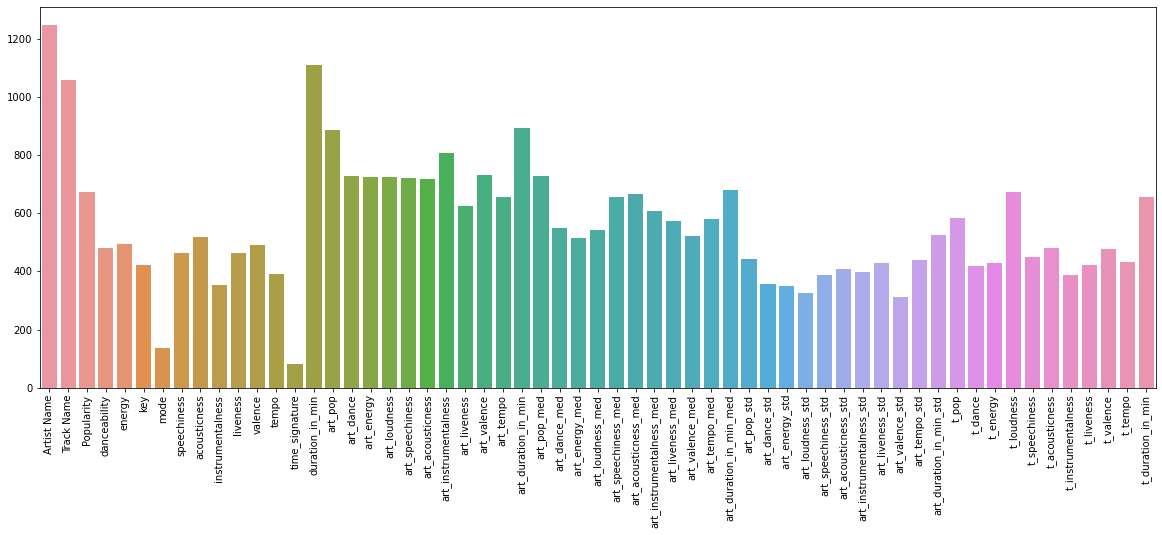

In [1243]:
plt.figure(figsize = (20,7))
sns.barplot(x = X.columns, y = importances)
plt.xticks(rotation = 'vertical')

In [1244]:
lgb_oofs, lgb_preds = cross_val(train_proc, test_proc, features, LGBMClassifier(random_state = 42))
# 1.1826771652774295
# 1.1471217635484185 - artist popular
# 1.0184487038952095 - only artist
# 0.9870136958258814


================================Fold1===================================

 Logloss for Validation set is : 1.0166071147125

================================Fold2===================================

 Logloss for Validation set is : 0.9768151845970814

================================Fold3===================================

 Logloss for Validation set is : 0.9665788244886284

================================Fold4===================================

 Logloss for Validation set is : 0.985338644290215

================================Fold5===================================

 Logloss for Validation set is : 1.0099264542059587

================================Fold6===================================

 Logloss for Validation set is : 0.9602384518682792

================================Fold7===================================

 Logloss for Validation set is : 0.9523171650674928

================================Fold8===================================

 Logloss for Validation set is : 0.99963

---

## Hyperparameter Tuning 

In [1249]:
# import optuna
# def objective(trial):
#     param = {'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
#            'max_depth': trial.suggest_int('max_depth', 4, 30),
#            #'min_samples_split': trial.suggest_int('min_samples_split', 5, 200),
#            #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#            'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1),
#            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.3, 1),
#            #'num_leaves' : trial.suggest_uniform('num_leaves', 5, 1000),
#            'reg_alpha': trial.suggest_uniform('reg_alpha', 0.1, 200),
#            'reg_lambda': trial.suggest_uniform('reg_lambda', 0.1, 200)
#           }

#     skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42) 
#     over_acc = 0
#     for fold, (tr_ind, val_ind) in enumerate(skf.split(train_proc[features], train_proc[target])):
#         X_train, X_val = train_proc[features].loc[tr_ind], train_proc[features].loc[val_ind]
#         y_train, y_val = train_proc[target][tr_ind], train_proc[target][val_ind]
    
#         model = LGBMClassifier(**param,random_state=42, n_jobs=-1, eval_metric = 'mlogloss', use_label_encoder = False) 
#         model.fit(X_train, y_train)
#         val_pred = model.predict_proba(X_val) 
#         accuracy = log_loss(y_val, val_pred)
#         over_acc = over_acc + (accuracy)/5
#         #print(f'\nlog loss score for validation set is {accuracy}')

#         return over_acc
  

    
# study = optuna.create_study(direction="minimize") 
# study.optimize(objective, n_trials=100)

[I 2021-08-12 17:25:08,166] A new study created in memory with name: no-name-cfa9f40e-dd9e-4788-87da-e5f591b566be


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:14,327] Trial 0 finished with value: 0.22007671749830732 and parameters: {'n_estimators': 1005, 'max_depth': 25, 'learning_rate': 0.04661928401375254, 'colsample_bytree': 0.3708405278195322, 'reg_alpha': 57.11751583540125, 'reg_lambda': 6.380959115711573}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:21,200] Trial 1 finished with value: 0.2618480965428346 and parameters: {'n_estimators': 1378, 'max_depth': 29, 'learning_rate': 0.2285543641511807, 'colsample_bytree': 0.4927674733022881, 'reg_alpha': 151.03871248720338, 'reg_lambda': 146.6374576170253}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:26,670] Trial 2 finished with value: 0.26897177939913114 and parameters: {'n_estimators': 1111, 'max_depth': 29, 'learning_rate': 0.4647608611198551, 'colsample_bytree': 0.5213631757850029, 'reg_alpha': 161.95192754155903, 'reg_lambda': 117.69583292914268}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:29,523] Trial 3 finished with value: 0.23270059429336168 and parameters: {'n_estimators': 532, 'max_depth': 30, 'learning_rate': 0.33469796245490463, 'colsample_bytree': 0.4367777570343309, 'reg_alpha': 80.96506566616523, 'reg_lambda': 76.95686094185118}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric


[I 2021-08-12 17:25:32,220] Trial 4 finished with value: 0.24254179822016747 and parameters: {'n_estimators': 656, 'max_depth': 4, 'learning_rate': 0.7277285053175045, 'colsample_bytree': 0.3473103534822868, 'reg_alpha': 90.87019161367802, 'reg_lambda': 102.43306226408967}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:35,901] Trial 5 finished with value: 0.25121124743973294 and parameters: {'n_estimators': 517, 'max_depth': 14, 'learning_rate': 0.263763932600293, 'colsample_bytree': 0.821691432601787, 'reg_alpha': 126.78672027918977, 'reg_lambda': 114.98700082265813}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:39,727] Trial 6 finished with value: 0.2389034691605195 and parameters: {'n_estimators': 932, 'max_depth': 5, 'learning_rate': 0.6768645274595874, 'colsample_bytree': 0.3627879009985616, 'reg_alpha': 87.50301260759151, 'reg_lambda': 155.26645671746002}. Best is trial 0 with value: 0.22007671749830732.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:48,460] Trial 7 finished with value: 0.20211328380085797 and parameters: {'n_estimators': 727, 'max_depth': 9, 'learning_rate': 0.11232404991908478, 'colsample_bytree': 0.8296234190165697, 'reg_alpha': 26.775377628605085, 'reg_lambda': 172.05972304794867}. Best is trial 7 with value: 0.20211328380085797.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:52,972] Trial 8 finished with value: 0.2566390032750118 and parameters: {'n_estimators': 951, 'max_depth': 25, 'learning_rate': 0.5195224499672918, 'colsample_bytree': 0.4205621992257406, 'reg_alpha': 103.95470175408137, 'reg_lambda': 0.2698647280644257}. Best is trial 7 with value: 0.20211328380085797.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:25:57,425] Trial 9 finished with value: 0.26254201273444133 and parameters: {'n_estimators': 903, 'max_depth': 20, 'learning_rate': 0.8246401207150669, 'colsample_bytree': 0.4345573718618149, 'reg_alpha': 135.29160797778997, 'reg_lambda': 91.96158045939394}. Best is trial 7 with value: 0.20211328380085797.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:26:25,157] Trial 10 finished with value: 0.19682019531340494 and parameters: {'n_estimators': 731, 'max_depth': 11, 'learning_rate': 0.03303453089426092, 'colsample_bytree': 0.9755029214546506, 'reg_alpha': 18.152006203277764, 'reg_lambda': 197.32218291299785}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:27:00,222] Trial 11 finished with value: 0.20288885261025835 and parameters: {'n_estimators': 730, 'max_depth': 11, 'learning_rate': 0.015091141108038865, 'colsample_bytree': 0.9979433876095735, 'reg_alpha': 15.927828442266957, 'reg_lambda': 193.69388985085612}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:27:38,543] Trial 12 finished with value: 0.20861282912619875 and parameters: {'n_estimators': 734, 'max_depth': 10, 'learning_rate': 0.14056982591607137, 'colsample_bytree': 0.8730788402840577, 'reg_alpha': 3.2144421780433525, 'reg_lambda': 194.18234635553586}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:27:42,035] Trial 13 finished with value: 0.21518211349469335 and parameters: {'n_estimators': 448, 'max_depth': 9, 'learning_rate': 0.9638651638784508, 'colsample_bytree': 0.740361459451868, 'reg_alpha': 39.60767744546006, 'reg_lambda': 164.77014101019105}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:27:48,623] Trial 14 finished with value: 0.27752110406743674 and parameters: {'n_estimators': 786, 'max_depth': 18, 'learning_rate': 0.1586562470258871, 'colsample_bytree': 0.954500509455857, 'reg_alpha': 189.78360607866108, 'reg_lambda': 174.9033825130896}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:27:56,369] Trial 15 finished with value: 0.21226217367687034 and parameters: {'n_estimators': 1212, 'max_depth': 15, 'learning_rate': 0.40980661802456453, 'colsample_bytree': 0.6758558624723185, 'reg_alpha': 38.14383622451663, 'reg_lambda': 46.90830612805077}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:28:04,066] Trial 16 finished with value: 0.20291619286518672 and parameters: {'n_estimators': 646, 'max_depth': 8, 'learning_rate': 0.11693584665617668, 'colsample_bytree': 0.8586975539705627, 'reg_alpha': 28.508574772891315, 'reg_lambda': 136.0380736834222}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:28:10,432] Trial 17 finished with value: 0.22146658867550265 and parameters: {'n_estimators': 833, 'max_depth': 14, 'learning_rate': 0.575488551231109, 'colsample_bytree': 0.9161222665488855, 'reg_alpha': 57.61461720315324, 'reg_lambda': 198.67959950869758}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:28:15,015] Trial 18 finished with value: 0.22222846003797633 and parameters: {'n_estimators': 582, 'max_depth': 7, 'learning_rate': 0.31679410221262283, 'colsample_bytree': 0.7602369983987651, 'reg_alpha': 59.375970805530834, 'reg_lambda': 174.97062351782319}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:28:32,189] Trial 19 finished with value: 0.20032194755629268 and parameters: {'n_estimators': 404, 'max_depth': 11, 'learning_rate': 0.018968775189157024, 'colsample_bytree': 0.611817504243766, 'reg_alpha': 1.8697982250632386, 'reg_lambda': 135.13602071877133}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:28:49,005] Trial 20 finished with value: 0.1975688486503469 and parameters: {'n_estimators': 408, 'max_depth': 12, 'learning_rate': 0.01844375563755478, 'colsample_bytree': 0.5900595416388899, 'reg_alpha': 9.05425487791855, 'reg_lambda': 61.89171764466808}. Best is trial 10 with value: 0.19682019531340494.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:08,508] Trial 21 finished with value: 0.19082951404854542 and parameters: {'n_estimators': 402, 'max_depth': 12, 'learning_rate': 0.028560120209422463, 'colsample_bytree': 0.5900975541732788, 'reg_alpha': 2.2369514301458793, 'reg_lambda': 63.28365947522442}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:15,041] Trial 22 finished with value: 0.1954904396239214 and parameters: {'n_estimators': 413, 'max_depth': 17, 'learning_rate': 0.21654393093350652, 'colsample_bytree': 0.5868150631361546, 'reg_alpha': 10.222804771605345, 'reg_lambda': 55.37159355130696}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:20,175] Trial 23 finished with value: 0.19917451478783493 and parameters: {'n_estimators': 511, 'max_depth': 19, 'learning_rate': 0.20653370468054896, 'colsample_bytree': 0.665832309082495, 'reg_alpha': 20.561053261308263, 'reg_lambda': 33.93499053990821}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:23,972] Trial 24 finished with value: 0.22038905682003246 and parameters: {'n_estimators': 612, 'max_depth': 16, 'learning_rate': 0.3482920053172972, 'colsample_bytree': 0.5490823988669014, 'reg_alpha': 50.4322327888363, 'reg_lambda': 26.03482779000018}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:29,225] Trial 25 finished with value: 0.22597205826257497 and parameters: {'n_estimators': 491, 'max_depth': 21, 'learning_rate': 0.10153698382845641, 'colsample_bytree': 0.7166742127285023, 'reg_alpha': 70.9180195578836, 'reg_lambda': 68.9881763500378}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:29:39,261] Trial 26 finished with value: 0.20840624098367982 and parameters: {'n_estimators': 1439, 'max_depth': 13, 'learning_rate': 0.2012198736108731, 'colsample_bytree': 0.6041368383036813, 'reg_alpha': 35.54089311967353, 'reg_lambda': 46.06295126858157}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:06,952] Trial 27 finished with value: 0.2504639788785286 and parameters: {'n_estimators': 596, 'max_depth': 23, 'learning_rate': 0.272587017860221, 'colsample_bytree': 0.4917555687473156, 'reg_alpha': 0.44570026856710476, 'reg_lambda': 83.9108947920101}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:18,456] Trial 28 finished with value: 0.19614104540546856 and parameters: {'n_estimators': 1122, 'max_depth': 17, 'learning_rate': 0.0988707537593959, 'colsample_bytree': 0.5560645781271153, 'reg_alpha': 17.09326218622019, 'reg_lambda': 55.154418391593694}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:25,388] Trial 29 finished with value: 0.21402426752045348 and parameters: {'n_estimators': 1101, 'max_depth': 17, 'learning_rate': 0.09145370996239238, 'colsample_bytree': 0.30551757027210924, 'reg_alpha': 43.57052357936031, 'reg_lambda': 55.80661947574968}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:33,079] Trial 30 finished with value: 0.23111901498566115 and parameters: {'n_estimators': 1248, 'max_depth': 22, 'learning_rate': 0.39093016061805586, 'colsample_bytree': 0.5764807730262076, 'reg_alpha': 68.14259380196839, 'reg_lambda': 18.991702526007572}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:45,292] Trial 31 finished with value: 0.1972386550245459 and parameters: {'n_estimators': 1061, 'max_depth': 16, 'learning_rate': 0.06697276985195139, 'colsample_bytree': 0.6311942292230911, 'reg_alpha': 19.279966720806335, 'reg_lambda': 34.24833805301544}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:30:54,222] Trial 32 finished with value: 0.19639175973484108 and parameters: {'n_estimators': 1250, 'max_depth': 18, 'learning_rate': 0.19684525163487254, 'colsample_bytree': 0.5504718561453212, 'reg_alpha': 13.891650595167313, 'reg_lambda': 13.41217641353441}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:03,610] Trial 33 finished with value: 0.1975122623040819 and parameters: {'n_estimators': 1280, 'max_depth': 18, 'learning_rate': 0.2157697830407415, 'colsample_bytree': 0.5148412542343259, 'reg_alpha': 10.910031197619844, 'reg_lambda': 15.03626580477885}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:11,570] Trial 34 finished with value: 0.20595538914541414 and parameters: {'n_estimators': 1177, 'max_depth': 24, 'learning_rate': 0.16285988605330107, 'colsample_bytree': 0.4825037034005626, 'reg_alpha': 29.206227890979235, 'reg_lambda': 47.082964075770654}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:21,361] Trial 35 finished with value: 0.19572347219641711 and parameters: {'n_estimators': 1326, 'max_depth': 20, 'learning_rate': 0.28228435367771193, 'colsample_bytree': 0.5497922252711662, 'reg_alpha': 13.322948268785566, 'reg_lambda': 70.6954207902874}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:29,977] Trial 36 finished with value: 0.24266010850323952 and parameters: {'n_estimators': 1349, 'max_depth': 28, 'learning_rate': 0.2556757698746055, 'colsample_bytree': 0.6858321497601444, 'reg_alpha': 108.33459716679059, 'reg_lambda': 76.18752897013287}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:38,888] Trial 37 finished with value: 0.21881417196519243 and parameters: {'n_estimators': 1500, 'max_depth': 21, 'learning_rate': 0.30140479126032066, 'colsample_bytree': 0.4623074539002061, 'reg_alpha': 51.93283890932646, 'reg_lambda': 103.32831969318065}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:46,753] Trial 38 finished with value: 0.27104312163473077 and parameters: {'n_estimators': 1365, 'max_depth': 27, 'learning_rate': 0.4069462181131627, 'colsample_bytree': 0.5450332760392664, 'reg_alpha': 170.52037304667257, 'reg_lambda': 63.03771493101395}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:31:53,903] Trial 39 finished with value: 0.20447591611930158 and parameters: {'n_estimators': 992, 'max_depth': 14, 'learning_rate': 0.48279150184214914, 'colsample_bytree': 0.6377094877737942, 'reg_alpha': 23.88565254278528, 'reg_lambda': 87.67291336432027}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:32:02,821] Trial 40 finished with value: 0.20526987611189398 and parameters: {'n_estimators': 1155, 'max_depth': 20, 'learning_rate': 0.0738476340001592, 'colsample_bytree': 0.4079124135215204, 'reg_alpha': 30.50827020232606, 'reg_lambda': 74.26092417634548}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:32:14,023] Trial 41 finished with value: 0.19511588190503115 and parameters: {'n_estimators': 1293, 'max_depth': 16, 'learning_rate': 0.1820422229658334, 'colsample_bytree': 0.557087151350793, 'reg_alpha': 10.583677102960971, 'reg_lambda': 34.145054990959906}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:32:27,314] Trial 42 finished with value: 0.1948435244581064 and parameters: {'n_estimators': 1331, 'max_depth': 16, 'learning_rate': 0.17087916945315176, 'colsample_bytree': 0.568539572986346, 'reg_alpha': 10.075409461957356, 'reg_lambda': 53.512833720939526}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:32:38,727] Trial 43 finished with value: 0.20067701815941424 and parameters: {'n_estimators': 1331, 'max_depth': 15, 'learning_rate': 0.24456440854106515, 'colsample_bytree': 0.5221475308746237, 'reg_alpha': 8.072143316263377, 'reg_lambda': 30.90212385605929}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:07,467] Trial 44 finished with value: 0.23585940535012492 and parameters: {'n_estimators': 1438, 'max_depth': 13, 'learning_rate': 0.17583621972595836, 'colsample_bytree': 0.6369079716512596, 'reg_alpha': 1.9953830062554818, 'reg_lambda': 40.673780183860956}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:19,775] Trial 45 finished with value: 0.1989940623357679 and parameters: {'n_estimators': 1305, 'max_depth': 19, 'learning_rate': 0.363545385420296, 'colsample_bytree': 0.5844677795737122, 'reg_alpha': 9.473536888780558, 'reg_lambda': 97.00694612142551}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:28,537] Trial 46 finished with value: 0.20442065681407123 and parameters: {'n_estimators': 1417, 'max_depth': 16, 'learning_rate': 0.27639121741801614, 'colsample_bytree': 0.46341296638462265, 'reg_alpha': 26.287725266437217, 'reg_lambda': 54.93040870669729}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:35,606] Trial 47 finished with value: 0.25241601352723053 and parameters: {'n_estimators': 1496, 'max_depth': 13, 'learning_rate': 0.5763807869008627, 'colsample_bytree': 0.39012825897822334, 'reg_alpha': 120.35334637008648, 'reg_lambda': 106.58117971670656}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:42,530] Trial 48 finished with value: 0.21172847670816414 and parameters: {'n_estimators': 889, 'max_depth': 15, 'learning_rate': 0.1269959925747352, 'colsample_bytree': 0.5183334804284389, 'reg_alpha': 40.48483219133262, 'reg_lambda': 81.96484849106768}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:48,000] Trial 49 finished with value: 0.2299071198478791 and parameters: {'n_estimators': 457, 'max_depth': 19, 'learning_rate': 0.0562423014932096, 'colsample_bytree': 0.7820620181267579, 'reg_alpha': 81.0132649696944, 'reg_lambda': 66.95058177867368}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:33:52,452] Trial 50 finished with value: 0.2626937272985849 and parameters: {'n_estimators': 555, 'max_depth': 26, 'learning_rate': 0.1511156053846996, 'colsample_bytree': 0.7098089379204829, 'reg_alpha': 154.3264129298039, 'reg_lambda': 2.633023389901094}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:34:02,565] Trial 51 finished with value: 0.19579654192302814 and parameters: {'n_estimators': 1054, 'max_depth': 17, 'learning_rate': 0.12145353034323214, 'colsample_bytree': 0.5470494405544836, 'reg_alpha': 16.47174234029374, 'reg_lambda': 56.78336871432884}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:34:12,442] Trial 52 finished with value: 0.1960082067512892 and parameters: {'n_estimators': 1206, 'max_depth': 17, 'learning_rate': 0.22636154314866658, 'colsample_bytree': 0.6191733721322275, 'reg_alpha': 13.7722828801661, 'reg_lambda': 40.48933329081328}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:34:20,629] Trial 53 finished with value: 0.2083852453326628 and parameters: {'n_estimators': 1027, 'max_depth': 20, 'learning_rate': 0.13807409478273652, 'colsample_bytree': 0.5676145331075817, 'reg_alpha': 35.06259260706461, 'reg_lambda': 54.601525719906014}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:34:47,022] Trial 54 finished with value: 0.3523466285638512 and parameters: {'n_estimators': 1391, 'max_depth': 15, 'learning_rate': 0.7559258992467772, 'colsample_bytree': 0.5231047360382486, 'reg_alpha': 0.2678911144063443, 'reg_lambda': 22.66731597916337}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:34:54,995] Trial 55 finished with value: 0.20171125680439297 and parameters: {'n_estimators': 1291, 'max_depth': 6, 'learning_rate': 0.3038524973344432, 'colsample_bytree': 0.44545214484149454, 'reg_alpha': 22.924834930405567, 'reg_lambda': 72.17625049489921}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:04,185] Trial 56 finished with value: 0.21307981002890455 and parameters: {'n_estimators': 860, 'max_depth': 12, 'learning_rate': 0.04990157929970512, 'colsample_bytree': 0.602324095540472, 'reg_alpha': 44.26399858041101, 'reg_lambda': 62.38325860212349}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:11,156] Trial 57 finished with value: 0.23801025976001117 and parameters: {'n_estimators': 777, 'max_depth': 10, 'learning_rate': 0.9860640874303964, 'colsample_bytree': 0.6701553445648535, 'reg_alpha': 7.603810005314038, 'reg_lambda': 41.53829092234024}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:15,540] Trial 58 finished with value: 0.20725029168577644 and parameters: {'n_estimators': 458, 'max_depth': 22, 'learning_rate': 0.18423103579063685, 'colsample_bytree': 0.5025220077014411, 'reg_alpha': 32.06467643663257, 'reg_lambda': 120.79391228913603}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:22,476] Trial 59 finished with value: 0.2005978669899095 and parameters: {'n_estimators': 967, 'max_depth': 17, 'learning_rate': 0.44471967153198544, 'colsample_bytree': 0.6532176413271142, 'reg_alpha': 17.610602903438014, 'reg_lambda': 49.32664440581213}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:29,212] Trial 60 finished with value: 0.23224632340563128 and parameters: {'n_estimators': 679, 'max_depth': 18, 'learning_rate': 0.9015065756974199, 'colsample_bytree': 0.5403665009818757, 'reg_alpha': 5.998494079567622, 'reg_lambda': 82.09795495362266}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:39,432] Trial 61 finished with value: 0.19669224051853795 and parameters: {'n_estimators': 1201, 'max_depth': 16, 'learning_rate': 0.22521490894582552, 'colsample_bytree': 0.6127235926585974, 'reg_alpha': 16.277951433451317, 'reg_lambda': 34.43097148711865}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:35:52,021] Trial 62 finished with value: 0.19497539809734118 and parameters: {'n_estimators': 1259, 'max_depth': 17, 'learning_rate': 0.12063105032037014, 'colsample_bytree': 0.5711248186078492, 'reg_alpha': 14.824025449772389, 'reg_lambda': 40.780051624420175}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:36:03,636] Trial 63 finished with value: 0.20110462583730074 and parameters: {'n_estimators': 1318, 'max_depth': 14, 'learning_rate': 0.11711313762356401, 'colsample_bytree': 0.5780219167315424, 'reg_alpha': 23.91251267572732, 'reg_lambda': 60.34677695512962}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:36:33,113] Trial 64 finished with value: 0.19273190842105095 and parameters: {'n_estimators': 1232, 'max_depth': 19, 'learning_rate': 0.037170139900168805, 'colsample_bytree': 0.480862711599833, 'reg_alpha': 8.541209935295237, 'reg_lambda': 47.461954636659385}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:36:51,346] Trial 65 finished with value: 0.19525041340107158 and parameters: {'n_estimators': 1266, 'max_depth': 20, 'learning_rate': 0.07236984446225356, 'colsample_bytree': 0.48003169869273626, 'reg_alpha': 7.720416626593163, 'reg_lambda': 26.821131741690834}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:37:24,324] Trial 66 finished with value: 0.1939429983991891 and parameters: {'n_estimators': 1231, 'max_depth': 21, 'learning_rate': 0.030207337285988504, 'colsample_bytree': 0.47779413106460267, 'reg_alpha': 7.628921514654213, 'reg_lambda': 28.541843382769567}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:38:23,777] Trial 67 finished with value: 0.22239418335314368 and parameters: {'n_estimators': 1249, 'max_depth': 22, 'learning_rate': 0.03524696085967825, 'colsample_bytree': 0.47804891576514735, 'reg_alpha': 0.17887962816305958, 'reg_lambda': 11.112046714251177}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:38:41,653] Trial 68 finished with value: 0.19753626353207815 and parameters: {'n_estimators': 1149, 'max_depth': 24, 'learning_rate': 0.07854436988069415, 'colsample_bytree': 0.4204711936897525, 'reg_alpha': 6.336530221607694, 'reg_lambda': 25.732523716128608}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:38:55,532] Trial 69 finished with value: 0.1986186981887807 and parameters: {'n_estimators': 1267, 'max_depth': 21, 'learning_rate': 0.0388672731010139, 'colsample_bytree': 0.4435071696153308, 'reg_alpha': 21.600966788353265, 'reg_lambda': 30.873405074934237}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:39:05,709] Trial 70 finished with value: 0.21417304193218012 and parameters: {'n_estimators': 1224, 'max_depth': 23, 'learning_rate': 0.026896716217652165, 'colsample_bytree': 0.35519006711208184, 'reg_alpha': 45.550657193531706, 'reg_lambda': 7.686703837786517}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:39:21,935] Trial 71 finished with value: 0.1933607147185074 and parameters: {'n_estimators': 1386, 'max_depth': 19, 'learning_rate': 0.08992471089954632, 'colsample_bytree': 0.49701229921148277, 'reg_alpha': 9.055189773449928, 'reg_lambda': 40.98685085377761}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:39:39,966] Trial 72 finished with value: 0.19815874840762315 and parameters: {'n_estimators': 1391, 'max_depth': 19, 'learning_rate': 0.0896217243719033, 'colsample_bytree': 0.5031926361225606, 'reg_alpha': 6.288235858317563, 'reg_lambda': 19.104064087203763}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:40:03,379] Trial 73 finished with value: 0.20265398864599163 and parameters: {'n_estimators': 1100, 'max_depth': 20, 'learning_rate': 0.012447146836135917, 'colsample_bytree': 0.4571224972276875, 'reg_alpha': 27.135874321671796, 'reg_lambda': 44.045245059467234}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:40:19,287] Trial 74 finished with value: 0.19321288973014064 and parameters: {'n_estimators': 1454, 'max_depth': 18, 'learning_rate': 0.06360618096587936, 'colsample_bytree': 0.4772239416917638, 'reg_alpha': 12.513097116031322, 'reg_lambda': 34.899531366885014}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:40:31,207] Trial 75 finished with value: 0.194845238817725 and parameters: {'n_estimators': 1462, 'max_depth': 18, 'learning_rate': 0.15344832512458384, 'colsample_bytree': 0.5278142626031525, 'reg_alpha': 12.857765881123614, 'reg_lambda': 37.17497469064243}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:40:40,289] Trial 76 finished with value: 0.20786093013612 and parameters: {'n_estimators': 1474, 'max_depth': 18, 'learning_rate': 0.1072394492741866, 'colsample_bytree': 0.38584147851856126, 'reg_alpha': 33.4501983239185, 'reg_lambda': 50.8309440070925}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:40:48,621] Trial 77 finished with value: 0.2559062220046408 and parameters: {'n_estimators': 1448, 'max_depth': 19, 'learning_rate': 0.1457478821632933, 'colsample_bytree': 0.5319563064940582, 'reg_alpha': 138.2005566220755, 'reg_lambda': 36.95220048189809}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:41:03,318] Trial 78 finished with value: 0.19313752042602844 and parameters: {'n_estimators': 1361, 'max_depth': 21, 'learning_rate': 0.0578046180478485, 'colsample_bytree': 0.5019368779554549, 'reg_alpha': 13.094252536431805, 'reg_lambda': 19.588738067859293}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:41:15,308] Trial 79 finished with value: 0.19863477819140107 and parameters: {'n_estimators': 1353, 'max_depth': 21, 'learning_rate': 0.056454679317140995, 'colsample_bytree': 0.42078126170332286, 'reg_alpha': 21.085019629184657, 'reg_lambda': 21.549737236813222}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:42:14,743] Trial 80 finished with value: 0.190858096269224 and parameters: {'n_estimators': 1388, 'max_depth': 23, 'learning_rate': 0.01431314778808808, 'colsample_bytree': 0.48569051182775624, 'reg_alpha': 3.5550730959924035, 'reg_lambda': 29.76753613734806}. Best is trial 21 with value: 0.19082951404854542.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:43:18,441] Trial 81 finished with value: 0.18911412473047892 and parameters: {'n_estimators': 1409, 'max_depth': 23, 'learning_rate': 0.010008140362909423, 'colsample_bytree': 0.4987098006902121, 'reg_alpha': 2.906714031122867, 'reg_lambda': 28.395280127483197}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:44:06,747] Trial 82 finished with value: 0.1986077613452062 and parameters: {'n_estimators': 1409, 'max_depth': 22, 'learning_rate': 0.023106325114840624, 'colsample_bytree': 0.5024726174470312, 'reg_alpha': 4.705888922339035, 'reg_lambda': 15.339644666897776}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:45:08,840] Trial 83 finished with value: 0.18951126086864456 and parameters: {'n_estimators': 1367, 'max_depth': 24, 'learning_rate': 0.011818667548155137, 'colsample_bytree': 0.4678612412908426, 'reg_alpha': 2.409407387352724, 'reg_lambda': 24.739808221722832}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:46:13,672] Trial 84 finished with value: 0.24991881257183265 and parameters: {'n_estimators': 1411, 'max_depth': 24, 'learning_rate': 0.04895481212989524, 'colsample_bytree': 0.46677032064949237, 'reg_alpha': 0.13237446718869705, 'reg_lambda': 8.838208980234352}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:46:27,523] Trial 85 finished with value: 0.23564778968703526 and parameters: {'n_estimators': 1377, 'max_depth': 25, 'learning_rate': 0.012368662664236287, 'colsample_bytree': 0.4897433495717533, 'reg_alpha': 93.6219000551986, 'reg_lambda': 28.792596083302627}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:46:38,903] Trial 86 finished with value: 0.19721288507158302 and parameters: {'n_estimators': 1435, 'max_depth': 23, 'learning_rate': 0.0803550635289634, 'colsample_bytree': 0.43020321049183846, 'reg_alpha': 18.526024386559776, 'reg_lambda': 16.8159477596123}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:46:47,537] Trial 87 finished with value: 0.2843278944336741 and parameters: {'n_estimators': 1478, 'max_depth': 25, 'learning_rate': 0.05047163942647533, 'colsample_bytree': 0.40477201408736424, 'reg_alpha': 199.84013902805543, 'reg_lambda': 22.781914104835867}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:47:07,134] Trial 88 finished with value: 0.21453573488070585 and parameters: {'n_estimators': 1350, 'max_depth': 23, 'learning_rate': 0.08771189358138047, 'colsample_bytree': 0.44704316803382926, 'reg_alpha': 3.3847547359069496, 'reg_lambda': 3.2950466039098174}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:47:27,637] Trial 89 finished with value: 0.19259792627597788 and parameters: {'n_estimators': 1389, 'max_depth': 26, 'learning_rate': 0.03701630297384313, 'colsample_bytree': 0.4793783924552839, 'reg_alpha': 12.015062109642509, 'reg_lambda': 28.702630603746332}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:47:44,022] Trial 90 finished with value: 0.19368125860167604 and parameters: {'n_estimators': 1387, 'max_depth': 26, 'learning_rate': 0.06486540612213192, 'colsample_bytree': 0.5036768962608058, 'reg_alpha': 14.125321438378311, 'reg_lambda': 44.97683765690371}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:47:59,824] Trial 91 finished with value: 0.1933439755621594 and parameters: {'n_estimators': 1381, 'max_depth': 29, 'learning_rate': 0.06630164332017463, 'colsample_bytree': 0.5043502742319885, 'reg_alpha': 12.91602299417444, 'reg_lambda': 47.60045447551482}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:48:10,776] Trial 92 finished with value: 0.1991381120932286 and parameters: {'n_estimators': 1414, 'max_depth': 30, 'learning_rate': 0.1033948895143612, 'colsample_bytree': 0.465147759262114, 'reg_alpha': 20.242633434160112, 'reg_lambda': 36.195169054445316}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:48:32,686] Trial 93 finished with value: 0.20252226189677974 and parameters: {'n_estimators': 1371, 'max_depth': 27, 'learning_rate': 0.01558569832568267, 'colsample_bytree': 0.5087785355224482, 'reg_alpha': 27.25798836851012, 'reg_lambda': 31.49033164294883}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:48:56,365] Trial 94 finished with value: 0.19219611415748045 and parameters: {'n_estimators': 1443, 'max_depth': 29, 'learning_rate': 0.04154088225082919, 'colsample_bytree': 0.4915691630860869, 'reg_alpha': 10.670213904847166, 'reg_lambda': 49.73017283757557}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:49:15,483] Trial 95 finished with value: 0.19237237691792736 and parameters: {'n_estimators': 1457, 'max_depth': 28, 'learning_rate': 0.0490541142429893, 'colsample_bytree': 0.4324456386164574, 'reg_alpha': 12.207043238622834, 'reg_lambda': 50.55784867221898}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:49:57,951] Trial 96 finished with value: 0.21131828042174416 and parameters: {'n_estimators': 1456, 'max_depth': 29, 'learning_rate': 0.04465998048827578, 'colsample_bytree': 0.431666011530075, 'reg_alpha': 3.2629123694738515, 'reg_lambda': 23.656455858649203}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:50:09,569] Trial 97 finished with value: 0.209783946769994 and parameters: {'n_estimators': 1435, 'max_depth': 28, 'learning_rate': 0.03943933629202063, 'colsample_bytree': 0.34058233724177817, 'reg_alpha': 37.744113722691736, 'reg_lambda': 65.95632905313386}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:50:18,769] Trial 98 finished with value: 0.20204678979344023 and parameters: {'n_estimators': 1480, 'max_depth': 28, 'learning_rate': 0.10433759824012553, 'colsample_bytree': 0.4030405352306066, 'reg_alpha': 24.577848141296585, 'reg_lambda': 12.647037091573178}. Best is trial 81 with value: 0.18911412473047892.


[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-08-12 17:50:26,237] Trial 99 finished with value: 0.22359023027285713 and parameters: {'n_estimators': 1326, 'max_depth': 26, 'learning_rate': 0.13075485587499644, 'colsample_bytree': 0.3861879155074878, 'reg_alpha': 62.17161369314587, 'reg_lambda': 50.4860121221391}. Best is trial 81 with value: 0.18911412473047892.


In [1255]:
# import optuna
# def objective(trial):
#     param = {'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
#            'max_depth': trial.suggest_int('max_depth', 4, 30),
#            #'min_samples_split': trial.suggest_int('min_samples_split', 5, 200),
#            #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#            'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1),
#            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.3, 1),
#            #'num_leaves' : trial.suggest_uniform('num_leaves', 5, 1000),
#            'reg_alpha': trial.suggest_uniform('reg_alpha', 0.1, 200),
#            'reg_lambda': trial.suggest_uniform('reg_lambda', 0.1, 200)
#           }

#     skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42) 
#     over_acc = 0
#     for fold, (tr_ind, val_ind) in enumerate(skf.split(train_proc[features], train_proc[target])):
#         X_train, X_val = train_proc[features].loc[tr_ind], train_proc[features].loc[val_ind]
#         y_train, y_val = train_proc[target][tr_ind], train_proc[target][val_ind]
    
#         model = XGBClassifier(**param,random_state=42, n_jobs=-1, eval_metric = 'mlogloss', use_label_encoder = False) 
#         model.fit(X_train, y_train)
#         val_pred = model.predict_proba(X_val) 
#         accuracy = log_loss(y_val, val_pred)
#         over_acc = over_acc + (accuracy)/5
#         #print(f'\nlog loss score for validation set is {accuracy}')

#         return over_acc
  

    
# study = optuna.create_study(direction="minimize") 
# study.optimize(objective, n_trials=50)

In [1251]:
lgb_params = {'n_estimators': 1409, 'max_depth': 23, 'learning_rate': 0.010008140362909423, 'colsample_bytree': 0.4987098006902121, 'reg_alpha': 2.906714031122867, 'reg_lambda': 28.395280127483197}
xgb_params = {'n_estimators': 1160, 'max_depth': 10, 'learning_rate': 0.18561373406902093, 'colsample_bytree': 0.8746924113414306, 'reg_alpha': 14.338924785665572, 'reg_lambda': 95.49578648751631}

In [1252]:
lgb_oofs, lgb_preds = cross_val(train_proc, test_proc, features, LGBMClassifier(**lgb_params, random_state = 42))


================================Fold1===================================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 Logloss for Validation set is : 0.9605538443547094

================================Fold2===================================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 Logloss for Validation set is : 0.9121134305519417

================================Fold3===================================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 Logloss for Validation set is : 0.9308441809294095

================================Fold4===================================
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 Logloss for Validation 

In [1254]:
cat_oofs, cat_preds = cross_val(train_proc, test_proc, features, CatBoostClassifier(cat_features = ['Artist Name'], random_state = 42))


================================Fold1===================================
Learning rate set to 0.090655
0:	learn: 2.2268877	total: 238ms	remaining: 3m 57s
1:	learn: 2.0864388	total: 456ms	remaining: 3m 47s
2:	learn: 1.9791163	total: 680ms	remaining: 3m 46s
3:	learn: 1.8864483	total: 913ms	remaining: 3m 47s
4:	learn: 1.8062263	total: 1.14s	remaining: 3m 47s
5:	learn: 1.7389286	total: 1.38s	remaining: 3m 48s
6:	learn: 1.6883039	total: 1.63s	remaining: 3m 51s
7:	learn: 1.6417309	total: 1.91s	remaining: 3m 57s
8:	learn: 1.5992262	total: 2.19s	remaining: 4m
9:	learn: 1.5675125	total: 2.47s	remaining: 4m 4s
10:	learn: 1.5346695	total: 2.74s	remaining: 4m 6s
11:	learn: 1.5053146	total: 3.02s	remaining: 4m 8s
12:	learn: 1.4781817	total: 3.3s	remaining: 4m 10s
13:	learn: 1.4516737	total: 3.58s	remaining: 4m 11s
14:	learn: 1.4221823	total: 3.84s	remaining: 4m 12s
15:	learn: 1.3977721	total: 4.09s	remaining: 4m 11s
16:	learn: 1.3721225	total: 4.36s	remaining: 4m 12s
17:	learn: 1.3476005	total: 4.

157:	learn: 0.8522229	total: 44.3s	remaining: 3m 56s
158:	learn: 0.8506904	total: 44.6s	remaining: 3m 55s
159:	learn: 0.8496312	total: 44.9s	remaining: 3m 55s
160:	learn: 0.8485532	total: 45.2s	remaining: 3m 55s
161:	learn: 0.8479491	total: 45.4s	remaining: 3m 55s
162:	learn: 0.8467920	total: 45.7s	remaining: 3m 54s
163:	learn: 0.8460686	total: 46s	remaining: 3m 54s
164:	learn: 0.8449466	total: 46.3s	remaining: 3m 54s
165:	learn: 0.8435491	total: 46.6s	remaining: 3m 53s
166:	learn: 0.8424262	total: 46.9s	remaining: 3m 53s
167:	learn: 0.8413832	total: 47.1s	remaining: 3m 53s
168:	learn: 0.8399866	total: 47.4s	remaining: 3m 53s
169:	learn: 0.8391075	total: 47.7s	remaining: 3m 52s
170:	learn: 0.8381073	total: 48s	remaining: 3m 52s
171:	learn: 0.8372045	total: 48.3s	remaining: 3m 52s
172:	learn: 0.8363320	total: 48.6s	remaining: 3m 52s
173:	learn: 0.8351532	total: 48.9s	remaining: 3m 51s
174:	learn: 0.8344184	total: 49.1s	remaining: 3m 51s
175:	learn: 0.8335170	total: 49.4s	remaining: 3m 5

311:	learn: 0.7264509	total: 1m 28s	remaining: 3m 15s
312:	learn: 0.7257549	total: 1m 28s	remaining: 3m 14s
313:	learn: 0.7247189	total: 1m 29s	remaining: 3m 14s
314:	learn: 0.7242734	total: 1m 29s	remaining: 3m 14s
315:	learn: 0.7238366	total: 1m 29s	remaining: 3m 14s
316:	learn: 0.7228012	total: 1m 29s	remaining: 3m 13s
317:	learn: 0.7221157	total: 1m 30s	remaining: 3m 13s
318:	learn: 0.7214446	total: 1m 30s	remaining: 3m 13s
319:	learn: 0.7205486	total: 1m 30s	remaining: 3m 12s
320:	learn: 0.7201146	total: 1m 31s	remaining: 3m 12s
321:	learn: 0.7198138	total: 1m 31s	remaining: 3m 12s
322:	learn: 0.7191432	total: 1m 31s	remaining: 3m 12s
323:	learn: 0.7188486	total: 1m 31s	remaining: 3m 11s
324:	learn: 0.7181720	total: 1m 32s	remaining: 3m 11s
325:	learn: 0.7175606	total: 1m 32s	remaining: 3m 11s
326:	learn: 0.7172458	total: 1m 32s	remaining: 3m 11s
327:	learn: 0.7168737	total: 1m 33s	remaining: 3m 11s
328:	learn: 0.7161631	total: 1m 33s	remaining: 3m 11s
329:	learn: 0.7154358	total:

465:	learn: 0.6427404	total: 2m 12s	remaining: 2m 31s
466:	learn: 0.6423900	total: 2m 12s	remaining: 2m 31s
467:	learn: 0.6416678	total: 2m 12s	remaining: 2m 31s
468:	learn: 0.6411354	total: 2m 13s	remaining: 2m 30s
469:	learn: 0.6404778	total: 2m 13s	remaining: 2m 30s
470:	learn: 0.6400916	total: 2m 13s	remaining: 2m 30s
471:	learn: 0.6392519	total: 2m 14s	remaining: 2m 30s
472:	learn: 0.6388734	total: 2m 14s	remaining: 2m 29s
473:	learn: 0.6385193	total: 2m 14s	remaining: 2m 29s
474:	learn: 0.6378494	total: 2m 14s	remaining: 2m 29s
475:	learn: 0.6372689	total: 2m 15s	remaining: 2m 28s
476:	learn: 0.6365359	total: 2m 15s	remaining: 2m 28s
477:	learn: 0.6359292	total: 2m 15s	remaining: 2m 28s
478:	learn: 0.6356088	total: 2m 16s	remaining: 2m 27s
479:	learn: 0.6350071	total: 2m 16s	remaining: 2m 27s
480:	learn: 0.6345149	total: 2m 16s	remaining: 2m 27s
481:	learn: 0.6337714	total: 2m 16s	remaining: 2m 27s
482:	learn: 0.6330383	total: 2m 17s	remaining: 2m 26s
483:	learn: 0.6326132	total:

618:	learn: 0.5767738	total: 2m 54s	remaining: 1m 47s
619:	learn: 0.5760793	total: 2m 55s	remaining: 1m 47s
620:	learn: 0.5757719	total: 2m 55s	remaining: 1m 47s
621:	learn: 0.5754646	total: 2m 55s	remaining: 1m 46s
622:	learn: 0.5747775	total: 2m 55s	remaining: 1m 46s
623:	learn: 0.5742956	total: 2m 56s	remaining: 1m 46s
624:	learn: 0.5738847	total: 2m 56s	remaining: 1m 45s
625:	learn: 0.5735603	total: 2m 56s	remaining: 1m 45s
626:	learn: 0.5731527	total: 2m 57s	remaining: 1m 45s
627:	learn: 0.5726653	total: 2m 57s	remaining: 1m 45s
628:	learn: 0.5722520	total: 2m 57s	remaining: 1m 44s
629:	learn: 0.5719743	total: 2m 57s	remaining: 1m 44s
630:	learn: 0.5715154	total: 2m 58s	remaining: 1m 44s
631:	learn: 0.5711541	total: 2m 58s	remaining: 1m 43s
632:	learn: 0.5704811	total: 2m 58s	remaining: 1m 43s
633:	learn: 0.5701525	total: 2m 58s	remaining: 1m 43s
634:	learn: 0.5698116	total: 2m 59s	remaining: 1m 43s
635:	learn: 0.5694843	total: 2m 59s	remaining: 1m 42s
636:	learn: 0.5689738	total:

771:	learn: 0.5174116	total: 3m 37s	remaining: 1m 4s
772:	learn: 0.5171481	total: 3m 37s	remaining: 1m 3s
773:	learn: 0.5167619	total: 3m 38s	remaining: 1m 3s
774:	learn: 0.5164709	total: 3m 38s	remaining: 1m 3s
775:	learn: 0.5162504	total: 3m 38s	remaining: 1m 3s
776:	learn: 0.5158013	total: 3m 39s	remaining: 1m 2s
777:	learn: 0.5156261	total: 3m 39s	remaining: 1m 2s
778:	learn: 0.5152295	total: 3m 39s	remaining: 1m 2s
779:	learn: 0.5148556	total: 3m 39s	remaining: 1m 2s
780:	learn: 0.5145434	total: 3m 40s	remaining: 1m 1s
781:	learn: 0.5143676	total: 3m 40s	remaining: 1m 1s
782:	learn: 0.5139700	total: 3m 40s	remaining: 1m 1s
783:	learn: 0.5138286	total: 3m 40s	remaining: 1m
784:	learn: 0.5134237	total: 3m 41s	remaining: 1m
785:	learn: 0.5130664	total: 3m 41s	remaining: 1m
786:	learn: 0.5126623	total: 3m 41s	remaining: 1m
787:	learn: 0.5123906	total: 3m 42s	remaining: 59.7s
788:	learn: 0.5121378	total: 3m 42s	remaining: 59.5s
789:	learn: 0.5116796	total: 3m 42s	remaining: 59.2s
790:	

928:	learn: 0.4667334	total: 4m 21s	remaining: 20s
929:	learn: 0.4663929	total: 4m 21s	remaining: 19.7s
930:	learn: 0.4661384	total: 4m 21s	remaining: 19.4s
931:	learn: 0.4660252	total: 4m 22s	remaining: 19.1s
932:	learn: 0.4657705	total: 4m 22s	remaining: 18.8s
933:	learn: 0.4655181	total: 4m 22s	remaining: 18.6s
934:	learn: 0.4652614	total: 4m 22s	remaining: 18.3s
935:	learn: 0.4650643	total: 4m 23s	remaining: 18s
936:	learn: 0.4649367	total: 4m 23s	remaining: 17.7s
937:	learn: 0.4645921	total: 4m 23s	remaining: 17.4s
938:	learn: 0.4643096	total: 4m 24s	remaining: 17.2s
939:	learn: 0.4638864	total: 4m 24s	remaining: 16.9s
940:	learn: 0.4635844	total: 4m 24s	remaining: 16.6s
941:	learn: 0.4634025	total: 4m 24s	remaining: 16.3s
942:	learn: 0.4630637	total: 4m 25s	remaining: 16s
943:	learn: 0.4627074	total: 4m 25s	remaining: 15.7s
944:	learn: 0.4623038	total: 4m 25s	remaining: 15.5s
945:	learn: 0.4620327	total: 4m 25s	remaining: 15.2s
946:	learn: 0.4616333	total: 4m 26s	remaining: 14.9s

82:	learn: 0.9682657	total: 23.1s	remaining: 4m 14s
83:	learn: 0.9666311	total: 23.3s	remaining: 4m 14s
84:	learn: 0.9651470	total: 23.6s	remaining: 4m 14s
85:	learn: 0.9630405	total: 23.9s	remaining: 4m 13s
86:	learn: 0.9614226	total: 24.2s	remaining: 4m 13s
87:	learn: 0.9590461	total: 24.5s	remaining: 4m 13s
88:	learn: 0.9576848	total: 24.7s	remaining: 4m 13s
89:	learn: 0.9558684	total: 25s	remaining: 4m 12s
90:	learn: 0.9538392	total: 25.3s	remaining: 4m 12s
91:	learn: 0.9521075	total: 25.6s	remaining: 4m 12s
92:	learn: 0.9503408	total: 25.9s	remaining: 4m 12s
93:	learn: 0.9480080	total: 26.1s	remaining: 4m 11s
94:	learn: 0.9453034	total: 26.4s	remaining: 4m 11s
95:	learn: 0.9425089	total: 26.7s	remaining: 4m 11s
96:	learn: 0.9408913	total: 27s	remaining: 4m 10s
97:	learn: 0.9392334	total: 27.2s	remaining: 4m 10s
98:	learn: 0.9373738	total: 27.5s	remaining: 4m 10s
99:	learn: 0.9361457	total: 27.8s	remaining: 4m 10s
100:	learn: 0.9345400	total: 28.1s	remaining: 4m 9s
101:	learn: 0.93

239:	learn: 0.7814978	total: 1m 6s	remaining: 3m 31s
240:	learn: 0.7807680	total: 1m 7s	remaining: 3m 31s
241:	learn: 0.7800314	total: 1m 7s	remaining: 3m 31s
242:	learn: 0.7792251	total: 1m 7s	remaining: 3m 30s
243:	learn: 0.7787171	total: 1m 7s	remaining: 3m 30s
244:	learn: 0.7778782	total: 1m 8s	remaining: 3m 30s
245:	learn: 0.7773432	total: 1m 8s	remaining: 3m 30s
246:	learn: 0.7768730	total: 1m 8s	remaining: 3m 29s
247:	learn: 0.7759366	total: 1m 9s	remaining: 3m 29s
248:	learn: 0.7752708	total: 1m 9s	remaining: 3m 29s
249:	learn: 0.7747240	total: 1m 9s	remaining: 3m 28s
250:	learn: 0.7741532	total: 1m 9s	remaining: 3m 28s
251:	learn: 0.7730852	total: 1m 10s	remaining: 3m 28s
252:	learn: 0.7720277	total: 1m 10s	remaining: 3m 28s
253:	learn: 0.7709810	total: 1m 10s	remaining: 3m 27s
254:	learn: 0.7703608	total: 1m 11s	remaining: 3m 27s
255:	learn: 0.7691049	total: 1m 11s	remaining: 3m 27s
256:	learn: 0.7679452	total: 1m 11s	remaining: 3m 26s
257:	learn: 0.7671253	total: 1m 11s	rema

392:	learn: 0.6810127	total: 1m 49s	remaining: 2m 49s
393:	learn: 0.6805913	total: 1m 49s	remaining: 2m 49s
394:	learn: 0.6798172	total: 1m 50s	remaining: 2m 48s
395:	learn: 0.6793427	total: 1m 50s	remaining: 2m 48s
396:	learn: 0.6787254	total: 1m 50s	remaining: 2m 48s
397:	learn: 0.6780842	total: 1m 51s	remaining: 2m 47s
398:	learn: 0.6773213	total: 1m 51s	remaining: 2m 47s
399:	learn: 0.6768660	total: 1m 51s	remaining: 2m 47s
400:	learn: 0.6762628	total: 1m 51s	remaining: 2m 47s
401:	learn: 0.6758804	total: 1m 52s	remaining: 2m 46s
402:	learn: 0.6752412	total: 1m 52s	remaining: 2m 46s
403:	learn: 0.6747342	total: 1m 52s	remaining: 2m 46s
404:	learn: 0.6743594	total: 1m 52s	remaining: 2m 45s
405:	learn: 0.6737520	total: 1m 53s	remaining: 2m 45s
406:	learn: 0.6731867	total: 1m 53s	remaining: 2m 45s
407:	learn: 0.6724362	total: 1m 53s	remaining: 2m 45s
408:	learn: 0.6716976	total: 1m 54s	remaining: 2m 44s
409:	learn: 0.6711084	total: 1m 54s	remaining: 2m 44s
410:	learn: 0.6703768	total:

545:	learn: 0.6072037	total: 2m 31s	remaining: 2m 6s
546:	learn: 0.6069562	total: 2m 32s	remaining: 2m 5s
547:	learn: 0.6067366	total: 2m 32s	remaining: 2m 5s
548:	learn: 0.6056628	total: 2m 32s	remaining: 2m 5s
549:	learn: 0.6054415	total: 2m 32s	remaining: 2m 5s
550:	learn: 0.6049919	total: 2m 33s	remaining: 2m 4s
551:	learn: 0.6046327	total: 2m 33s	remaining: 2m 4s
552:	learn: 0.6042114	total: 2m 33s	remaining: 2m 4s
553:	learn: 0.6035006	total: 2m 33s	remaining: 2m 3s
554:	learn: 0.6032098	total: 2m 34s	remaining: 2m 3s
555:	learn: 0.6026862	total: 2m 34s	remaining: 2m 3s
556:	learn: 0.6020443	total: 2m 34s	remaining: 2m 3s
557:	learn: 0.6017655	total: 2m 35s	remaining: 2m 2s
558:	learn: 0.6014110	total: 2m 35s	remaining: 2m 2s
559:	learn: 0.6011066	total: 2m 35s	remaining: 2m 2s
560:	learn: 0.6006558	total: 2m 35s	remaining: 2m 2s
561:	learn: 0.6002246	total: 2m 36s	remaining: 2m 1s
562:	learn: 0.5997451	total: 2m 36s	remaining: 2m 1s
563:	learn: 0.5988999	total: 2m 36s	remaining:

699:	learn: 0.5429536	total: 3m 14s	remaining: 1m 23s
700:	learn: 0.5424338	total: 3m 14s	remaining: 1m 22s
701:	learn: 0.5419809	total: 3m 14s	remaining: 1m 22s
702:	learn: 0.5416130	total: 3m 15s	remaining: 1m 22s
703:	learn: 0.5414342	total: 3m 15s	remaining: 1m 22s
704:	learn: 0.5411432	total: 3m 15s	remaining: 1m 21s
705:	learn: 0.5406164	total: 3m 15s	remaining: 1m 21s
706:	learn: 0.5403394	total: 3m 16s	remaining: 1m 21s
707:	learn: 0.5396848	total: 3m 16s	remaining: 1m 21s
708:	learn: 0.5393888	total: 3m 16s	remaining: 1m 20s
709:	learn: 0.5390587	total: 3m 17s	remaining: 1m 20s
710:	learn: 0.5388814	total: 3m 17s	remaining: 1m 20s
711:	learn: 0.5384137	total: 3m 17s	remaining: 1m 19s
712:	learn: 0.5380678	total: 3m 17s	remaining: 1m 19s
713:	learn: 0.5378268	total: 3m 18s	remaining: 1m 19s
714:	learn: 0.5375520	total: 3m 18s	remaining: 1m 19s
715:	learn: 0.5372638	total: 3m 18s	remaining: 1m 18s
716:	learn: 0.5371148	total: 3m 18s	remaining: 1m 18s
717:	learn: 0.5365332	total:

854:	learn: 0.4913350	total: 3m 56s	remaining: 40.2s
855:	learn: 0.4909084	total: 3m 57s	remaining: 39.9s
856:	learn: 0.4906032	total: 3m 57s	remaining: 39.6s
857:	learn: 0.4902565	total: 3m 57s	remaining: 39.3s
858:	learn: 0.4897980	total: 3m 57s	remaining: 39.1s
859:	learn: 0.4895043	total: 3m 58s	remaining: 38.8s
860:	learn: 0.4889016	total: 3m 58s	remaining: 38.5s
861:	learn: 0.4886609	total: 3m 58s	remaining: 38.2s
862:	learn: 0.4882278	total: 3m 59s	remaining: 38s
863:	learn: 0.4879143	total: 3m 59s	remaining: 37.7s
864:	learn: 0.4874953	total: 3m 59s	remaining: 37.4s
865:	learn: 0.4871700	total: 3m 59s	remaining: 37.1s
866:	learn: 0.4867540	total: 4m	remaining: 36.9s
867:	learn: 0.4864131	total: 4m	remaining: 36.6s
868:	learn: 0.4860279	total: 4m	remaining: 36.3s
869:	learn: 0.4857720	total: 4m 1s	remaining: 36s
870:	learn: 0.4854736	total: 4m 1s	remaining: 35.8s
871:	learn: 0.4852020	total: 4m 1s	remaining: 35.5s
872:	learn: 0.4848306	total: 4m 2s	remaining: 35.2s
873:	learn: 0

8:	learn: 1.6031608	total: 2.46s	remaining: 4m 30s
9:	learn: 1.5647463	total: 2.74s	remaining: 4m 31s
10:	learn: 1.5358779	total: 3.01s	remaining: 4m 30s
11:	learn: 1.5031645	total: 3.29s	remaining: 4m 30s
12:	learn: 1.4744544	total: 3.56s	remaining: 4m 30s
13:	learn: 1.4466715	total: 3.84s	remaining: 4m 30s
14:	learn: 1.4256578	total: 4.12s	remaining: 4m 30s
15:	learn: 1.4036807	total: 4.4s	remaining: 4m 30s
16:	learn: 1.3766719	total: 4.66s	remaining: 4m 29s
17:	learn: 1.3577465	total: 4.92s	remaining: 4m 28s
18:	learn: 1.3316848	total: 5.19s	remaining: 4m 27s
19:	learn: 1.3171057	total: 5.45s	remaining: 4m 26s
20:	learn: 1.2989372	total: 5.72s	remaining: 4m 26s
21:	learn: 1.2844581	total: 6.01s	remaining: 4m 27s
22:	learn: 1.2667529	total: 6.29s	remaining: 4m 27s
23:	learn: 1.2489757	total: 6.57s	remaining: 4m 27s
24:	learn: 1.2337674	total: 6.85s	remaining: 4m 27s
25:	learn: 1.2219423	total: 7.12s	remaining: 4m 26s
26:	learn: 1.2079099	total: 7.39s	remaining: 4m 26s
27:	learn: 1.19

166:	learn: 0.8491045	total: 47.4s	remaining: 3m 56s
167:	learn: 0.8480464	total: 47.7s	remaining: 3m 56s
168:	learn: 0.8470804	total: 48s	remaining: 3m 55s
169:	learn: 0.8457608	total: 48.3s	remaining: 3m 55s
170:	learn: 0.8446367	total: 48.6s	remaining: 3m 55s
171:	learn: 0.8431414	total: 48.8s	remaining: 3m 55s
172:	learn: 0.8424631	total: 49.1s	remaining: 3m 54s
173:	learn: 0.8413979	total: 49.4s	remaining: 3m 54s
174:	learn: 0.8403168	total: 49.7s	remaining: 3m 54s
175:	learn: 0.8394689	total: 49.9s	remaining: 3m 53s
176:	learn: 0.8388082	total: 50.2s	remaining: 3m 53s
177:	learn: 0.8376571	total: 50.5s	remaining: 3m 53s
178:	learn: 0.8363763	total: 50.8s	remaining: 3m 53s
179:	learn: 0.8353489	total: 51.1s	remaining: 3m 52s
180:	learn: 0.8343817	total: 51.4s	remaining: 3m 52s
181:	learn: 0.8335510	total: 51.7s	remaining: 3m 52s
182:	learn: 0.8325459	total: 52s	remaining: 3m 51s
183:	learn: 0.8312183	total: 52.2s	remaining: 3m 51s
184:	learn: 0.8301290	total: 52.5s	remaining: 3m 5

320:	learn: 0.7320693	total: 1m 30s	remaining: 3m 10s
321:	learn: 0.7311178	total: 1m 30s	remaining: 3m 10s
322:	learn: 0.7304579	total: 1m 30s	remaining: 3m 9s
323:	learn: 0.7297483	total: 1m 30s	remaining: 3m 9s
324:	learn: 0.7290811	total: 1m 31s	remaining: 3m 9s
325:	learn: 0.7287092	total: 1m 31s	remaining: 3m 9s
326:	learn: 0.7277751	total: 1m 31s	remaining: 3m 8s
327:	learn: 0.7269772	total: 1m 32s	remaining: 3m 8s
328:	learn: 0.7261163	total: 1m 32s	remaining: 3m 8s
329:	learn: 0.7256506	total: 1m 32s	remaining: 3m 7s
330:	learn: 0.7252387	total: 1m 32s	remaining: 3m 7s
331:	learn: 0.7244892	total: 1m 33s	remaining: 3m 7s
332:	learn: 0.7239145	total: 1m 33s	remaining: 3m 7s
333:	learn: 0.7230201	total: 1m 33s	remaining: 3m 6s
334:	learn: 0.7222095	total: 1m 33s	remaining: 3m 6s
335:	learn: 0.7214871	total: 1m 34s	remaining: 3m 6s
336:	learn: 0.7208708	total: 1m 34s	remaining: 3m 5s
337:	learn: 0.7201928	total: 1m 34s	remaining: 3m 5s
338:	learn: 0.7198934	total: 1m 35s	remainin

474:	learn: 0.6470183	total: 2m 13s	remaining: 2m 27s
475:	learn: 0.6464198	total: 2m 13s	remaining: 2m 26s
476:	learn: 0.6461665	total: 2m 13s	remaining: 2m 26s
477:	learn: 0.6457509	total: 2m 13s	remaining: 2m 26s
478:	learn: 0.6453986	total: 2m 14s	remaining: 2m 25s
479:	learn: 0.6447694	total: 2m 14s	remaining: 2m 25s
480:	learn: 0.6443118	total: 2m 14s	remaining: 2m 25s
481:	learn: 0.6438110	total: 2m 14s	remaining: 2m 24s
482:	learn: 0.6433403	total: 2m 15s	remaining: 2m 24s
483:	learn: 0.6425494	total: 2m 15s	remaining: 2m 24s
484:	learn: 0.6420900	total: 2m 15s	remaining: 2m 24s
485:	learn: 0.6416565	total: 2m 15s	remaining: 2m 23s
486:	learn: 0.6413370	total: 2m 16s	remaining: 2m 23s
487:	learn: 0.6408536	total: 2m 16s	remaining: 2m 23s
488:	learn: 0.6403475	total: 2m 16s	remaining: 2m 22s
489:	learn: 0.6400264	total: 2m 17s	remaining: 2m 22s
490:	learn: 0.6396058	total: 2m 17s	remaining: 2m 22s
491:	learn: 0.6392463	total: 2m 17s	remaining: 2m 22s
492:	learn: 0.6388615	total:

627:	learn: 0.5793590	total: 2m 54s	remaining: 1m 43s
628:	learn: 0.5791059	total: 2m 55s	remaining: 1m 43s
629:	learn: 0.5786836	total: 2m 55s	remaining: 1m 43s
630:	learn: 0.5782737	total: 2m 55s	remaining: 1m 42s
631:	learn: 0.5778807	total: 2m 56s	remaining: 1m 42s
632:	learn: 0.5770784	total: 2m 56s	remaining: 1m 42s
633:	learn: 0.5767371	total: 2m 56s	remaining: 1m 41s
634:	learn: 0.5763213	total: 2m 56s	remaining: 1m 41s
635:	learn: 0.5760129	total: 2m 57s	remaining: 1m 41s
636:	learn: 0.5757538	total: 2m 57s	remaining: 1m 41s
637:	learn: 0.5752666	total: 2m 57s	remaining: 1m 40s
638:	learn: 0.5748693	total: 2m 58s	remaining: 1m 40s
639:	learn: 0.5745878	total: 2m 58s	remaining: 1m 40s
640:	learn: 0.5743569	total: 2m 58s	remaining: 1m 40s
641:	learn: 0.5737877	total: 2m 58s	remaining: 1m 39s
642:	learn: 0.5733768	total: 2m 59s	remaining: 1m 39s
643:	learn: 0.5730318	total: 2m 59s	remaining: 1m 39s
644:	learn: 0.5727806	total: 2m 59s	remaining: 1m 38s
645:	learn: 0.5723987	total:

781:	learn: 0.5237321	total: 3m 37s	remaining: 1m
782:	learn: 0.5234562	total: 3m 38s	remaining: 1m
783:	learn: 0.5230847	total: 3m 38s	remaining: 1m
784:	learn: 0.5228651	total: 3m 38s	remaining: 59.9s
785:	learn: 0.5225291	total: 3m 38s	remaining: 59.6s
786:	learn: 0.5222844	total: 3m 39s	remaining: 59.3s
787:	learn: 0.5217980	total: 3m 39s	remaining: 59.1s
788:	learn: 0.5216745	total: 3m 39s	remaining: 58.8s
789:	learn: 0.5214163	total: 3m 40s	remaining: 58.5s
790:	learn: 0.5211244	total: 3m 40s	remaining: 58.2s
791:	learn: 0.5208364	total: 3m 40s	remaining: 57.9s
792:	learn: 0.5205644	total: 3m 40s	remaining: 57.7s
793:	learn: 0.5199993	total: 3m 41s	remaining: 57.4s
794:	learn: 0.5197059	total: 3m 41s	remaining: 57.1s
795:	learn: 0.5194396	total: 3m 41s	remaining: 56.8s
796:	learn: 0.5190963	total: 3m 42s	remaining: 56.6s
797:	learn: 0.5188996	total: 3m 42s	remaining: 56.3s
798:	learn: 0.5186160	total: 3m 42s	remaining: 56s
799:	learn: 0.5181603	total: 3m 42s	remaining: 55.7s
800:

938:	learn: 0.4720553	total: 4m 23s	remaining: 17.1s
939:	learn: 0.4718942	total: 4m 23s	remaining: 16.8s
940:	learn: 0.4716754	total: 4m 23s	remaining: 16.6s
941:	learn: 0.4713493	total: 4m 24s	remaining: 16.3s
942:	learn: 0.4712695	total: 4m 24s	remaining: 16s
943:	learn: 0.4709975	total: 4m 24s	remaining: 15.7s
944:	learn: 0.4708182	total: 4m 25s	remaining: 15.4s
945:	learn: 0.4705727	total: 4m 25s	remaining: 15.1s
946:	learn: 0.4703635	total: 4m 25s	remaining: 14.9s
947:	learn: 0.4699940	total: 4m 25s	remaining: 14.6s
948:	learn: 0.4696748	total: 4m 26s	remaining: 14.3s
949:	learn: 0.4693058	total: 4m 26s	remaining: 14s
950:	learn: 0.4689658	total: 4m 26s	remaining: 13.7s
951:	learn: 0.4686887	total: 4m 26s	remaining: 13.5s
952:	learn: 0.4683814	total: 4m 27s	remaining: 13.2s
953:	learn: 0.4679736	total: 4m 27s	remaining: 12.9s
954:	learn: 0.4675985	total: 4m 27s	remaining: 12.6s
955:	learn: 0.4674483	total: 4m 28s	remaining: 12.3s
956:	learn: 0.4673346	total: 4m 28s	remaining: 12.

92:	learn: 0.9429522	total: 27.1s	remaining: 4m 24s
93:	learn: 0.9406345	total: 27.4s	remaining: 4m 23s
94:	learn: 0.9385128	total: 27.7s	remaining: 4m 23s
95:	learn: 0.9370418	total: 27.9s	remaining: 4m 22s
96:	learn: 0.9351790	total: 28.2s	remaining: 4m 22s
97:	learn: 0.9330718	total: 28.5s	remaining: 4m 22s
98:	learn: 0.9309608	total: 28.7s	remaining: 4m 21s
99:	learn: 0.9291603	total: 29s	remaining: 4m 21s
100:	learn: 0.9275936	total: 29.3s	remaining: 4m 20s
101:	learn: 0.9258802	total: 29.6s	remaining: 4m 20s
102:	learn: 0.9243227	total: 29.8s	remaining: 4m 19s
103:	learn: 0.9229580	total: 30.1s	remaining: 4m 19s
104:	learn: 0.9206241	total: 30.4s	remaining: 4m 19s
105:	learn: 0.9192271	total: 30.7s	remaining: 4m 18s
106:	learn: 0.9179095	total: 30.9s	remaining: 4m 18s
107:	learn: 0.9155716	total: 31.2s	remaining: 4m 17s
108:	learn: 0.9142412	total: 31.5s	remaining: 4m 17s
109:	learn: 0.9120354	total: 31.7s	remaining: 4m 16s
110:	learn: 0.9098031	total: 32s	remaining: 4m 16s
111:	

249:	learn: 0.7718949	total: 1m 9s	remaining: 3m 29s
250:	learn: 0.7713564	total: 1m 9s	remaining: 3m 28s
251:	learn: 0.7708301	total: 1m 10s	remaining: 3m 28s
252:	learn: 0.7702502	total: 1m 10s	remaining: 3m 28s
253:	learn: 0.7694119	total: 1m 10s	remaining: 3m 27s
254:	learn: 0.7684920	total: 1m 11s	remaining: 3m 27s
255:	learn: 0.7677871	total: 1m 11s	remaining: 3m 27s
256:	learn: 0.7669433	total: 1m 11s	remaining: 3m 27s
257:	learn: 0.7661351	total: 1m 11s	remaining: 3m 26s
258:	learn: 0.7653690	total: 1m 12s	remaining: 3m 26s
259:	learn: 0.7646704	total: 1m 12s	remaining: 3m 26s
260:	learn: 0.7638656	total: 1m 12s	remaining: 3m 25s
261:	learn: 0.7629885	total: 1m 12s	remaining: 3m 25s
262:	learn: 0.7622974	total: 1m 13s	remaining: 3m 25s
263:	learn: 0.7614057	total: 1m 13s	remaining: 3m 24s
264:	learn: 0.7609122	total: 1m 13s	remaining: 3m 24s
265:	learn: 0.7598725	total: 1m 14s	remaining: 3m 24s
266:	learn: 0.7594284	total: 1m 14s	remaining: 3m 24s
267:	learn: 0.7587554	total: 1

402:	learn: 0.6799242	total: 1m 51s	remaining: 2m 44s
403:	learn: 0.6795415	total: 1m 51s	remaining: 2m 44s
404:	learn: 0.6794027	total: 1m 51s	remaining: 2m 44s
405:	learn: 0.6788611	total: 1m 52s	remaining: 2m 43s
406:	learn: 0.6781838	total: 1m 52s	remaining: 2m 43s
407:	learn: 0.6771710	total: 1m 52s	remaining: 2m 43s
408:	learn: 0.6768982	total: 1m 52s	remaining: 2m 43s
409:	learn: 0.6762827	total: 1m 53s	remaining: 2m 42s
410:	learn: 0.6755156	total: 1m 53s	remaining: 2m 42s
411:	learn: 0.6750497	total: 1m 53s	remaining: 2m 42s
412:	learn: 0.6746213	total: 1m 53s	remaining: 2m 41s
413:	learn: 0.6739889	total: 1m 54s	remaining: 2m 41s
414:	learn: 0.6735767	total: 1m 54s	remaining: 2m 41s
415:	learn: 0.6731147	total: 1m 54s	remaining: 2m 41s
416:	learn: 0.6727671	total: 1m 55s	remaining: 2m 40s
417:	learn: 0.6723532	total: 1m 55s	remaining: 2m 40s
418:	learn: 0.6718158	total: 1m 55s	remaining: 2m 40s
419:	learn: 0.6713149	total: 1m 55s	remaining: 2m 39s
420:	learn: 0.6708239	total:

556:	learn: 0.6080038	total: 2m 33s	remaining: 2m 1s
557:	learn: 0.6076682	total: 2m 33s	remaining: 2m 1s
558:	learn: 0.6071656	total: 2m 33s	remaining: 2m 1s
559:	learn: 0.6069160	total: 2m 33s	remaining: 2m
560:	learn: 0.6064525	total: 2m 34s	remaining: 2m
561:	learn: 0.6060796	total: 2m 34s	remaining: 2m
562:	learn: 0.6058104	total: 2m 34s	remaining: 2m
563:	learn: 0.6054364	total: 2m 35s	remaining: 1m 59s
564:	learn: 0.6049413	total: 2m 35s	remaining: 1m 59s
565:	learn: 0.6045258	total: 2m 35s	remaining: 1m 59s
566:	learn: 0.6041057	total: 2m 35s	remaining: 1m 59s
567:	learn: 0.6036170	total: 2m 36s	remaining: 1m 58s
568:	learn: 0.6031697	total: 2m 36s	remaining: 1m 58s
569:	learn: 0.6027900	total: 2m 36s	remaining: 1m 58s
570:	learn: 0.6025271	total: 2m 36s	remaining: 1m 57s
571:	learn: 0.6020901	total: 2m 37s	remaining: 1m 57s
572:	learn: 0.6017949	total: 2m 37s	remaining: 1m 57s
573:	learn: 0.6016186	total: 2m 37s	remaining: 1m 57s
574:	learn: 0.6009882	total: 2m 37s	remaining: 

709:	learn: 0.5480224	total: 3m 14s	remaining: 1m 19s
710:	learn: 0.5476415	total: 3m 14s	remaining: 1m 19s
711:	learn: 0.5473040	total: 3m 15s	remaining: 1m 18s
712:	learn: 0.5468829	total: 3m 15s	remaining: 1m 18s
713:	learn: 0.5465795	total: 3m 15s	remaining: 1m 18s
714:	learn: 0.5463043	total: 3m 15s	remaining: 1m 18s
715:	learn: 0.5460240	total: 3m 16s	remaining: 1m 17s
716:	learn: 0.5457746	total: 3m 16s	remaining: 1m 17s
717:	learn: 0.5452880	total: 3m 16s	remaining: 1m 17s
718:	learn: 0.5450017	total: 3m 16s	remaining: 1m 16s
719:	learn: 0.5447319	total: 3m 17s	remaining: 1m 16s
720:	learn: 0.5443408	total: 3m 17s	remaining: 1m 16s
721:	learn: 0.5440297	total: 3m 17s	remaining: 1m 16s
722:	learn: 0.5435156	total: 3m 18s	remaining: 1m 15s
723:	learn: 0.5429589	total: 3m 18s	remaining: 1m 15s
724:	learn: 0.5424467	total: 3m 18s	remaining: 1m 15s
725:	learn: 0.5417451	total: 3m 18s	remaining: 1m 15s
726:	learn: 0.5415669	total: 3m 19s	remaining: 1m 14s
727:	learn: 0.5412416	total:

864:	learn: 0.4944105	total: 3m 56s	remaining: 36.9s
865:	learn: 0.4940610	total: 3m 57s	remaining: 36.7s
866:	learn: 0.4936707	total: 3m 57s	remaining: 36.4s
867:	learn: 0.4933446	total: 3m 57s	remaining: 36.1s
868:	learn: 0.4929545	total: 3m 57s	remaining: 35.9s
869:	learn: 0.4926335	total: 3m 58s	remaining: 35.6s
870:	learn: 0.4923371	total: 3m 58s	remaining: 35.3s
871:	learn: 0.4920197	total: 3m 58s	remaining: 35s
872:	learn: 0.4917928	total: 3m 58s	remaining: 34.8s
873:	learn: 0.4913298	total: 3m 59s	remaining: 34.5s
874:	learn: 0.4908885	total: 3m 59s	remaining: 34.2s
875:	learn: 0.4906747	total: 3m 59s	remaining: 33.9s
876:	learn: 0.4904733	total: 3m 59s	remaining: 33.7s
877:	learn: 0.4903393	total: 4m	remaining: 33.4s
878:	learn: 0.4901976	total: 4m	remaining: 33.1s
879:	learn: 0.4898499	total: 4m	remaining: 32.8s
880:	learn: 0.4894362	total: 4m 1s	remaining: 32.6s
881:	learn: 0.4890972	total: 4m 1s	remaining: 32.3s
882:	learn: 0.4889164	total: 4m 1s	remaining: 32s
883:	learn: 

18:	learn: 1.3159562	total: 5.21s	remaining: 4m 29s
19:	learn: 1.2964342	total: 5.48s	remaining: 4m 28s
20:	learn: 1.2788108	total: 5.74s	remaining: 4m 27s
21:	learn: 1.2614976	total: 6.03s	remaining: 4m 27s
22:	learn: 1.2476790	total: 6.31s	remaining: 4m 27s
23:	learn: 1.2319950	total: 6.59s	remaining: 4m 28s
24:	learn: 1.2196542	total: 6.86s	remaining: 4m 27s
25:	learn: 1.2106966	total: 7.14s	remaining: 4m 27s
26:	learn: 1.2007105	total: 7.42s	remaining: 4m 27s
27:	learn: 1.1892256	total: 7.69s	remaining: 4m 27s
28:	learn: 1.1789442	total: 7.98s	remaining: 4m 27s
29:	learn: 1.1680488	total: 8.27s	remaining: 4m 27s
30:	learn: 1.1606484	total: 8.55s	remaining: 4m 27s
31:	learn: 1.1507634	total: 8.84s	remaining: 4m 27s
32:	learn: 1.1433059	total: 9.12s	remaining: 4m 27s
33:	learn: 1.1373012	total: 9.4s	remaining: 4m 27s
34:	learn: 1.1318637	total: 9.68s	remaining: 4m 26s
35:	learn: 1.1251184	total: 9.96s	remaining: 4m 26s
36:	learn: 1.1188773	total: 10.2s	remaining: 4m 26s
37:	learn: 1.

176:	learn: 0.8342230	total: 48.2s	remaining: 3m 44s
177:	learn: 0.8331644	total: 48.5s	remaining: 3m 44s
178:	learn: 0.8319016	total: 48.8s	remaining: 3m 43s
179:	learn: 0.8309904	total: 49.1s	remaining: 3m 43s
180:	learn: 0.8301546	total: 49.3s	remaining: 3m 43s
181:	learn: 0.8291621	total: 49.6s	remaining: 3m 42s
182:	learn: 0.8285075	total: 49.9s	remaining: 3m 42s
183:	learn: 0.8277495	total: 50.2s	remaining: 3m 42s
184:	learn: 0.8271046	total: 50.4s	remaining: 3m 42s
185:	learn: 0.8262539	total: 50.7s	remaining: 3m 42s
186:	learn: 0.8251298	total: 51s	remaining: 3m 41s
187:	learn: 0.8243473	total: 51.3s	remaining: 3m 41s
188:	learn: 0.8237138	total: 51.6s	remaining: 3m 41s
189:	learn: 0.8228610	total: 51.9s	remaining: 3m 41s
190:	learn: 0.8220893	total: 52.1s	remaining: 3m 40s
191:	learn: 0.8211509	total: 52.4s	remaining: 3m 40s
192:	learn: 0.8199932	total: 52.7s	remaining: 3m 40s
193:	learn: 0.8192407	total: 53s	remaining: 3m 40s
194:	learn: 0.8181118	total: 53.2s	remaining: 3m 3

331:	learn: 0.7177616	total: 1m 30s	remaining: 3m 1s
332:	learn: 0.7170057	total: 1m 30s	remaining: 3m 1s
333:	learn: 0.7161533	total: 1m 30s	remaining: 3m 1s
334:	learn: 0.7158129	total: 1m 31s	remaining: 3m
335:	learn: 0.7150286	total: 1m 31s	remaining: 3m
336:	learn: 0.7144898	total: 1m 31s	remaining: 3m
337:	learn: 0.7139579	total: 1m 31s	remaining: 3m
338:	learn: 0.7135637	total: 1m 32s	remaining: 2m 59s
339:	learn: 0.7131721	total: 1m 32s	remaining: 2m 59s
340:	learn: 0.7124809	total: 1m 32s	remaining: 2m 59s
341:	learn: 0.7122044	total: 1m 33s	remaining: 2m 58s
342:	learn: 0.7117292	total: 1m 33s	remaining: 2m 58s
343:	learn: 0.7112299	total: 1m 33s	remaining: 2m 58s
344:	learn: 0.7107623	total: 1m 33s	remaining: 2m 58s
345:	learn: 0.7101713	total: 1m 34s	remaining: 2m 57s
346:	learn: 0.7094911	total: 1m 34s	remaining: 2m 57s
347:	learn: 0.7086798	total: 1m 34s	remaining: 2m 57s
348:	learn: 0.7075113	total: 1m 34s	remaining: 2m 57s
349:	learn: 0.7069388	total: 1m 35s	remaining: 

484:	learn: 0.6363740	total: 2m 11s	remaining: 2m 19s
485:	learn: 0.6359046	total: 2m 11s	remaining: 2m 19s
486:	learn: 0.6353996	total: 2m 12s	remaining: 2m 19s
487:	learn: 0.6347701	total: 2m 12s	remaining: 2m 19s
488:	learn: 0.6345383	total: 2m 12s	remaining: 2m 18s
489:	learn: 0.6339614	total: 2m 13s	remaining: 2m 18s
490:	learn: 0.6335360	total: 2m 13s	remaining: 2m 18s
491:	learn: 0.6328632	total: 2m 13s	remaining: 2m 17s
492:	learn: 0.6322295	total: 2m 13s	remaining: 2m 17s
493:	learn: 0.6316281	total: 2m 14s	remaining: 2m 17s
494:	learn: 0.6311348	total: 2m 14s	remaining: 2m 17s
495:	learn: 0.6308954	total: 2m 14s	remaining: 2m 16s
496:	learn: 0.6305532	total: 2m 14s	remaining: 2m 16s
497:	learn: 0.6297663	total: 2m 15s	remaining: 2m 16s
498:	learn: 0.6293136	total: 2m 15s	remaining: 2m 16s
499:	learn: 0.6287985	total: 2m 15s	remaining: 2m 15s
500:	learn: 0.6282647	total: 2m 16s	remaining: 2m 15s
501:	learn: 0.6275919	total: 2m 16s	remaining: 2m 15s
502:	learn: 0.6271567	total:

637:	learn: 0.5675670	total: 2m 53s	remaining: 1m 38s
638:	learn: 0.5672713	total: 2m 53s	remaining: 1m 38s
639:	learn: 0.5669425	total: 2m 53s	remaining: 1m 37s
640:	learn: 0.5665211	total: 2m 54s	remaining: 1m 37s
641:	learn: 0.5661997	total: 2m 54s	remaining: 1m 37s
642:	learn: 0.5659896	total: 2m 54s	remaining: 1m 37s
643:	learn: 0.5657334	total: 2m 55s	remaining: 1m 36s
644:	learn: 0.5653690	total: 2m 55s	remaining: 1m 36s
645:	learn: 0.5648705	total: 2m 55s	remaining: 1m 36s
646:	learn: 0.5641968	total: 2m 55s	remaining: 1m 35s
647:	learn: 0.5638729	total: 2m 56s	remaining: 1m 35s
648:	learn: 0.5635502	total: 2m 56s	remaining: 1m 35s
649:	learn: 0.5632464	total: 2m 56s	remaining: 1m 35s
650:	learn: 0.5624843	total: 2m 56s	remaining: 1m 34s
651:	learn: 0.5620348	total: 2m 57s	remaining: 1m 34s
652:	learn: 0.5617515	total: 2m 57s	remaining: 1m 34s
653:	learn: 0.5611083	total: 2m 57s	remaining: 1m 34s
654:	learn: 0.5608364	total: 2m 57s	remaining: 1m 33s
655:	learn: 0.5604930	total:

791:	learn: 0.5088622	total: 3m 35s	remaining: 56.5s
792:	learn: 0.5086188	total: 3m 35s	remaining: 56.2s
793:	learn: 0.5084253	total: 3m 35s	remaining: 55.9s
794:	learn: 0.5081676	total: 3m 35s	remaining: 55.7s
795:	learn: 0.5077998	total: 3m 36s	remaining: 55.4s
796:	learn: 0.5074087	total: 3m 36s	remaining: 55.1s
797:	learn: 0.5069875	total: 3m 36s	remaining: 54.9s
798:	learn: 0.5064735	total: 3m 36s	remaining: 54.6s
799:	learn: 0.5061638	total: 3m 37s	remaining: 54.3s
800:	learn: 0.5058338	total: 3m 37s	remaining: 54s
801:	learn: 0.5056188	total: 3m 37s	remaining: 53.8s
802:	learn: 0.5052693	total: 3m 38s	remaining: 53.5s
803:	learn: 0.5051026	total: 3m 38s	remaining: 53.2s
804:	learn: 0.5048335	total: 3m 38s	remaining: 52.9s
805:	learn: 0.5045129	total: 3m 38s	remaining: 52.7s
806:	learn: 0.5042861	total: 3m 39s	remaining: 52.4s
807:	learn: 0.5040201	total: 3m 39s	remaining: 52.1s
808:	learn: 0.5037225	total: 3m 39s	remaining: 51.9s
809:	learn: 0.5035349	total: 3m 39s	remaining: 5

947:	learn: 0.4619257	total: 4m 17s	remaining: 14.1s
948:	learn: 0.4617164	total: 4m 17s	remaining: 13.8s
949:	learn: 0.4612928	total: 4m 17s	remaining: 13.6s
950:	learn: 0.4611325	total: 4m 18s	remaining: 13.3s
951:	learn: 0.4607284	total: 4m 18s	remaining: 13s
952:	learn: 0.4604828	total: 4m 18s	remaining: 12.8s
953:	learn: 0.4601652	total: 4m 18s	remaining: 12.5s
954:	learn: 0.4598564	total: 4m 19s	remaining: 12.2s
955:	learn: 0.4593412	total: 4m 19s	remaining: 11.9s
956:	learn: 0.4590967	total: 4m 19s	remaining: 11.7s
957:	learn: 0.4588502	total: 4m 20s	remaining: 11.4s
958:	learn: 0.4586500	total: 4m 20s	remaining: 11.1s
959:	learn: 0.4581897	total: 4m 20s	remaining: 10.9s
960:	learn: 0.4578729	total: 4m 20s	remaining: 10.6s
961:	learn: 0.4573572	total: 4m 21s	remaining: 10.3s
962:	learn: 0.4569475	total: 4m 21s	remaining: 10s
963:	learn: 0.4568541	total: 4m 21s	remaining: 9.77s
964:	learn: 0.4566627	total: 4m 21s	remaining: 9.5s
965:	learn: 0.4564127	total: 4m 22s	remaining: 9.23

In [1257]:
xgb_oofs, xgb_preds = cross_val(train_proc, test_proc, features, XGBClassifier(**xgb_params, random_state = 42))


================================Fold1===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 1.0094108566098536

================================Fold2===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9348774906823464

================================Fold3===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9654944359547355

================================Fold4===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9695250536416037

================================Fold5===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9667593299375019

================================Fold6===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9412333019928903

================================Fold7===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9651534080139365

================================Fold8===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9823014351677537

================================Fold9===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 0.9652921954266159

================================Fold10===================================


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:06:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Logloss for Validation set is : 1.010765098234387

Logloss for oofs is 0.9710790919580145


In [1258]:
preds = lgb_preds*0.4 + xgb_preds*0.3 + cat_preds*0.3

---

## Submission

In [1264]:
sample[['Acoustic/Folk_0', 'Alt_Music_1', 'Blues_2', 'Bollywood_3', 'Country_4',
       'HipHop_5', 'Indie Alt_6', 'Instrumental_7', 'Metal_8', 'Pop_9',
       'Rock_10']] = cat_preds

In [1265]:
sample.to_csv(r"D:\Data Science\Music Genre Classification\cat_preds_final.csv", index = False)

I got better reults with default parameters which I have submitted with Hrishi's account XD